<a href="https://colab.research.google.com/github/vkslogan/MEM/blob/main/4_pml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entramos en la carpeta donde tenemos nuestros pml

In [ ]:
import os

Accedemos a la carpeta con todos los archivos csv. Yo llamé a la carpeta como "pml_data". PML (Precios Marginales Locales) 

In [ ]:
os.chdir('pml_data')

La variable dirs contiene una lista con los nombres de todos los archivos

In [ ]:
dirs = os.listdir()
dirs

['PreciosNodosDistrib SIN MDA Mes Dic02 v2021 01 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Ene01 v2020 02 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Jul01 v2020 08 03_08 00 21.csv',
 'PreciosNodosDistrib SIN MDA Mes Jun01 v2020 07 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Mar02 v2020 04 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Sep01 v2020 10 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Ago01 v2020 09 03_08 00 08.csv',
 'PreciosNodosDistrib SIN MDA Mes Oct01 v2020 11 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Ene02 v2020 02 03_08 00 07.csv',
 'PreciosNodosDistrib SIN MDA Mes Feb02 v2020 03 03_08 00 08.csv',
 'PreciosNodosDistrib SIN MDA Mes Sep02 v2020 10 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Mar01 v2020 04 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Abr01 v2020 05 03_08 00 06.csv',
 'PreciosNodosDistrib SIN MDA Mes Feb01 v2020 03 03_08 00 08.csv',
 'PreciosNodosDistrib SIN MDA Mes Oct02 v2020 11 03_08 00 07.c

La idea es iterar sobre la lista de archivos. Cada elemento de esta lista contiene el nombre del archivo a leer. Creamos un dataframe vacío que tiene la utilidad de almacenar cada archivo leído. ```file``` contiene 

In [ ]:
import pandas as pd
BD_PML = pd.DataFrame() #Dataframe vacío

for file in dirs: #iteramos sobre dirs
  df_file = pd.read_csv(file,header=7) #leemos el archivo
  BD_PML = pd.concat([BD_PML,df_file], ignore_index=True) #Concatenamos el archivo leído en BD_PML

Observamos que tenemos una tabla con 884,184 registros

In [ ]:
len(BD_PML)

887184

**Composición del Precio Marginal Local**

PML = COMP_ENERGIA + COMP_PERDIDAS + COMP_CONGESTION

COMP_ENERGIA: El costo implicado directamente por la generación de la energía. Depende de los costos operativos de las plantas que suministren la demanda de esa zona/nodo

COMP_PERDIDAS: El costo implicado por las perdidas de energía derivados del transporte de la energía por medio de la red de transmisión (Efecto Joule)

COMP_CONGESTION: El costo implicado por las horas en que las líneas de transmisión operan en su límite máximo. Solo se presenta en aquellas horas en que este fénomeno sucede

Cambiamos el nombre de nuestras columnas, observe que hay un doble espacio antes de indicar las unidades, ejemplo ```[Precio Zonal__($/MWh)]```. El argumento ```inplace=True``` permite guardar esta modificación en el dataframe

In [ ]:
BD_PML.rename(columns = {'Precio Zonal  ($/MWh)':'PML',
                         'Componente energia  ($/MWh)':'comp_energia',
                         'Componente perdidas  ($/MWh)':'comp_perdidas',
                         'Componente Congestion  ($/MWh)':'comp_cong',
                         'Zona de Carga':'Zona'},inplace=True)
BD_PML

Fecha  Hora            Zona  ...  comp_perdidas  comp_cong  Unnamed: 7
38784 2020-01-01     1        ACAPULCO  ...          41.40       0.00         NaN
38808 2020-01-01     1  AGUASCALIENTES  ...          -5.59       0.00         NaN
38832 2020-01-01     1      APATZINGAN  ...           8.69       0.00         NaN
38856 2020-01-01     1         CABORCA  ...         -81.67     -68.78         NaN
38880 2020-01-01     1         CAMARGO  ...         -56.42       0.00         NaN
...          ...   ...             ...  ...            ...        ...         ...
38687 2020-12-31    24          ZACAPU  ...           6.90       0.00         NaN
38711 2020-12-31    24       ZACATECAS  ...          -5.91       0.00         NaN
38735 2020-12-31    24          ZAMORA  ...           5.88       0.00         NaN
38759 2020-12-31    24        ZAPOTLAN  ...          -4.13       0.00         NaN
38783 2020-12-31    24     ZIHUATANEJO  ...          24.57       0.00         NaN

[887184 rows x 8 columns]

Utilizamos ```pd.to_datetime()``` para convertir los valores de la columna ```BD_PML['Fecha']```en un formato de fecha



In [ ]:
BD_PML['Fecha'] = pd.to_datetime(BD_PML['Fecha'])
BD_PML.sort_values(by=['Fecha','Hora'],inplace=True)
BD_PML

Fecha  Hora            Zona  ...  comp_perdidas  comp_cong  Unnamed: 7
38784 2020-01-01     1        ACAPULCO  ...          41.40       0.00         NaN
38808 2020-01-01     1  AGUASCALIENTES  ...          -5.59       0.00         NaN
38832 2020-01-01     1      APATZINGAN  ...           8.69       0.00         NaN
38856 2020-01-01     1         CABORCA  ...         -81.67     -68.78         NaN
38880 2020-01-01     1         CAMARGO  ...         -56.42       0.00         NaN
...          ...   ...             ...  ...            ...        ...         ...
38687 2020-12-31    24          ZACAPU  ...           6.90       0.00         NaN
38711 2020-12-31    24       ZACATECAS  ...          -5.91       0.00         NaN
38735 2020-12-31    24          ZAMORA  ...           5.88       0.00         NaN
38759 2020-12-31    24        ZAPOTLAN  ...          -4.13       0.00         NaN
38783 2020-12-31    24     ZIHUATANEJO  ...          24.57       0.00         NaN

[887184 rows x 8 columns]

Aplicamos dentro de nuestro ```.groupby()``` la función ```.mean()``` para obtener el Precio promedio diario dado en (MXN/MWh) 

In [ ]:
PML_diario = BD_PML.groupby(['Fecha','Zona'])['PML'].mean().reset_index()
PML_diario.columns

Index(['Fecha', 'Zona', 'PML'], dtype='object')

Queremos crear una gráfica del PML para cada zona de carga. Por lo que creamos una lista con las zonas de carga para iterar sobre ella

In [ ]:
Zonas = PML_diario['Zona'].unique()

```.pyplot``` es un módulo de la librería ```matplotlib```, y es quien nos ayudará específicamente a realizar nuestras gráficas

In [ ]:
import matplotlib.pyplot as plt

En cada iteración obtengo un subdataframe llamado ```plot_data``` del dataframe ```PML_diario[]```, este subdataframe lo utilizaremos para graficar con la librería de matplotlib. En la función ```plt.plot()``` proveemos de argumento la columna ```plot_data['Fecha']```como eje x y la columna ```plot_data['PML']``` como eje y. 

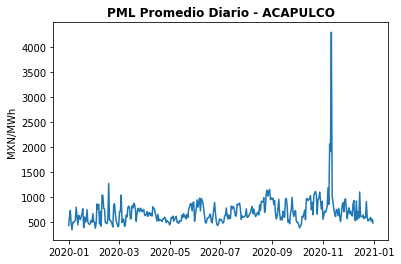

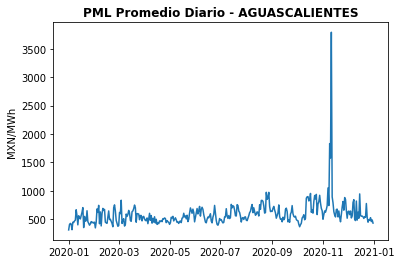

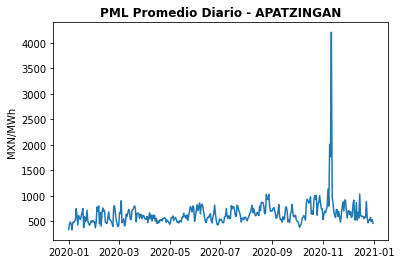

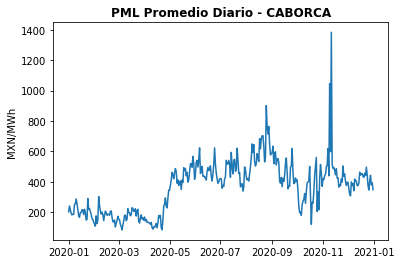

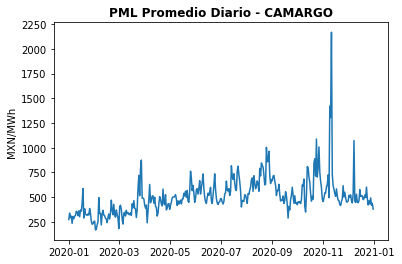

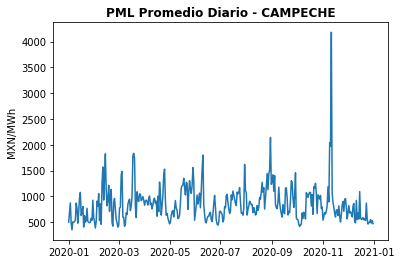

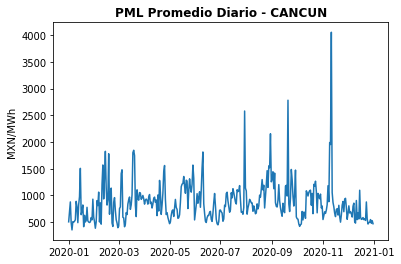

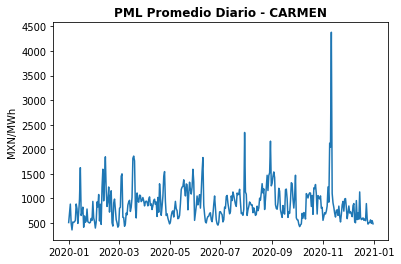

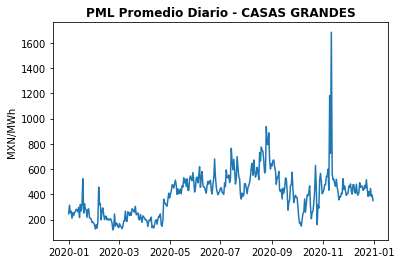

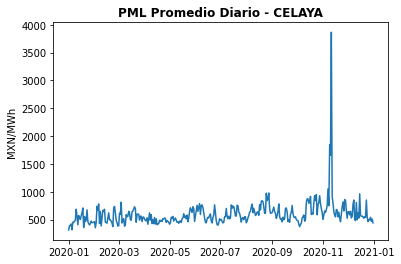

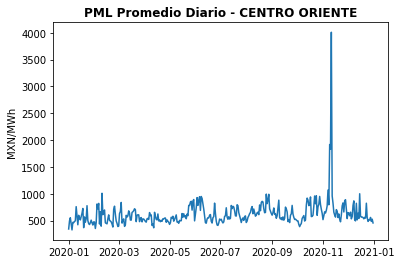

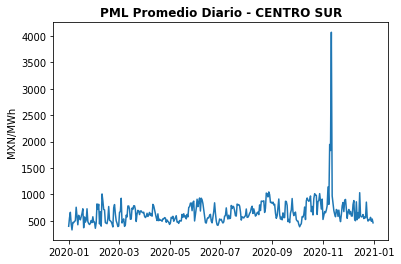

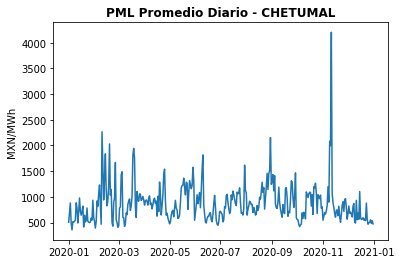

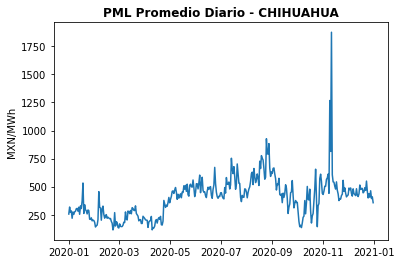

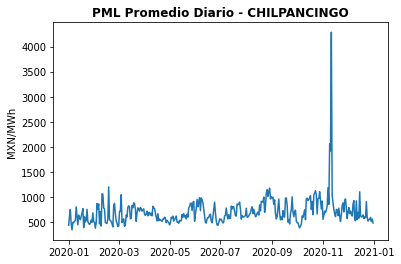

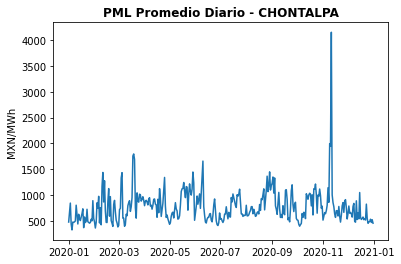

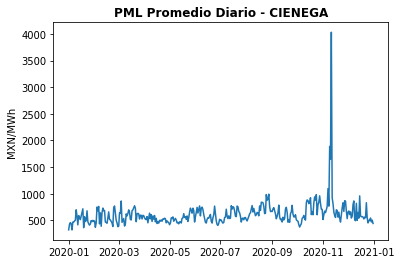

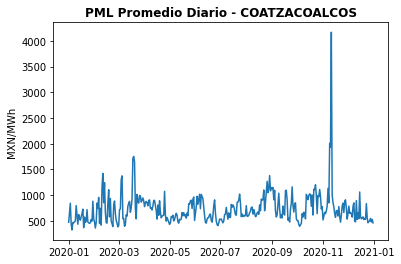

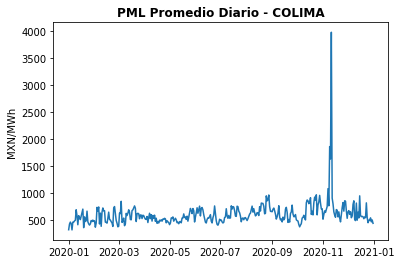

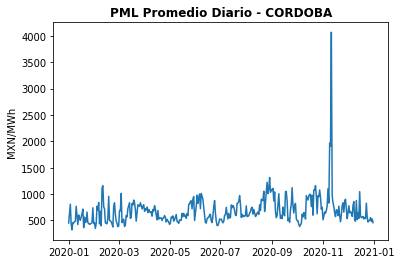

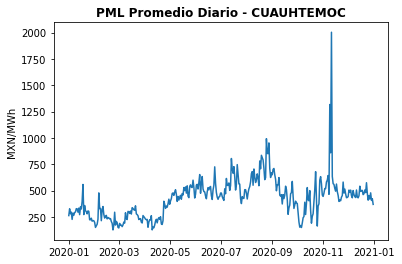

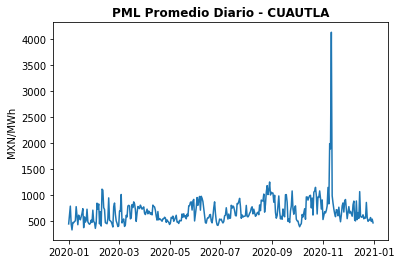

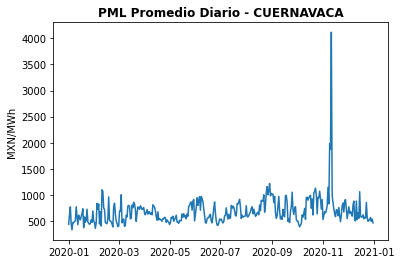

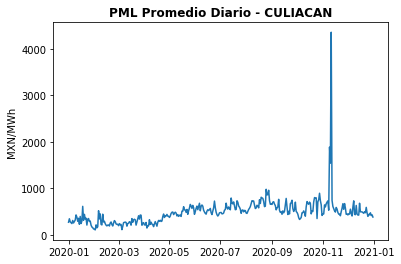

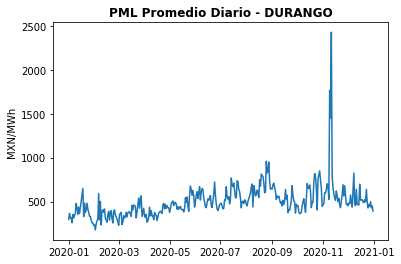

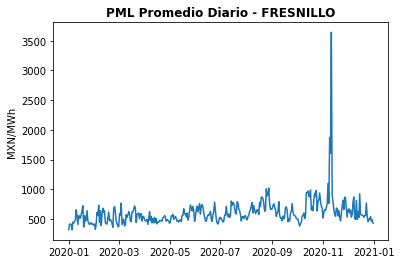

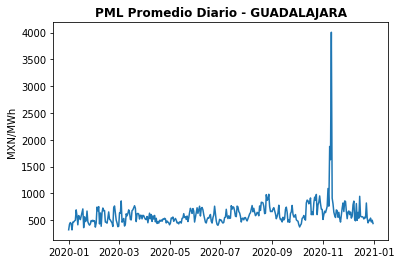

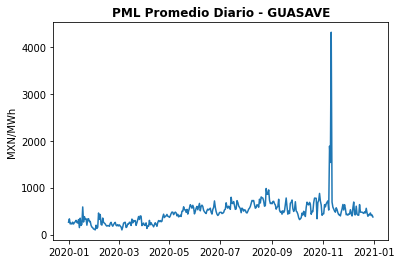

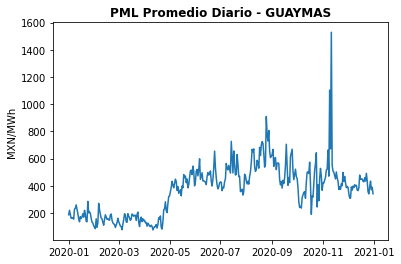

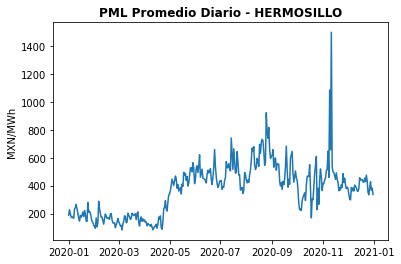

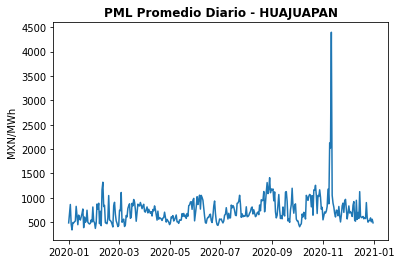

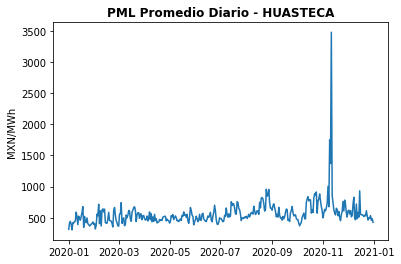

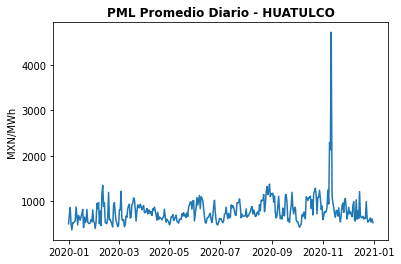

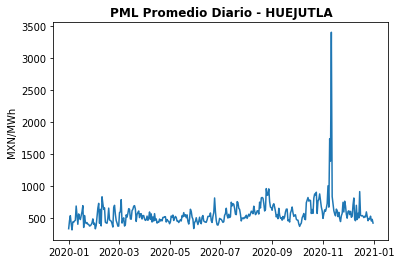

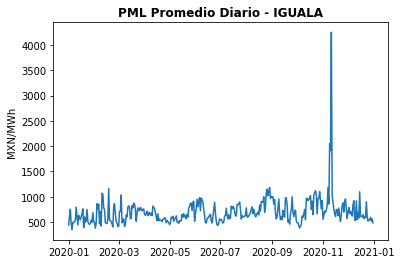

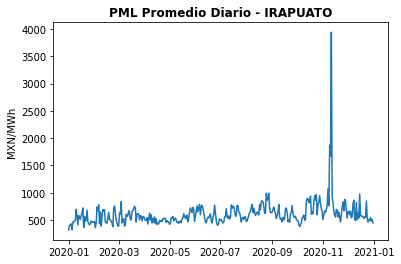

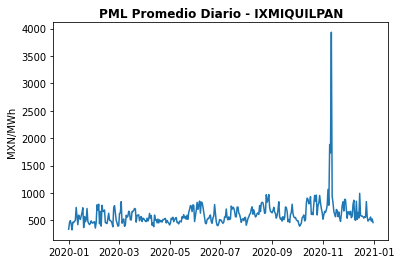

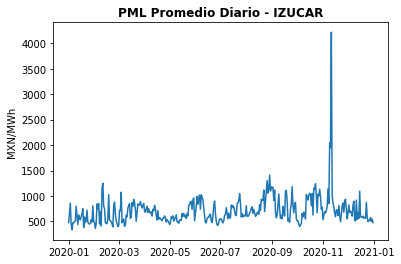

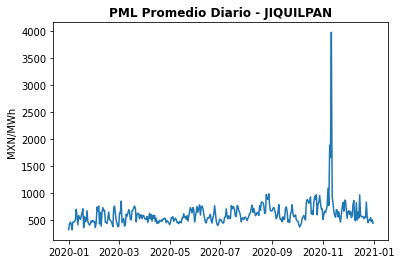

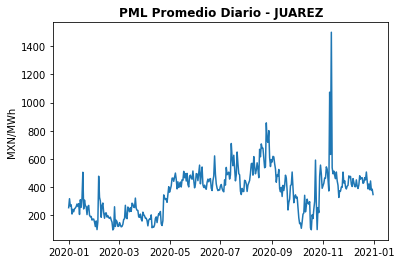

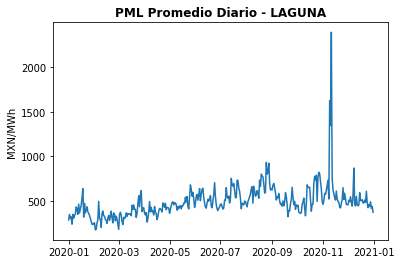

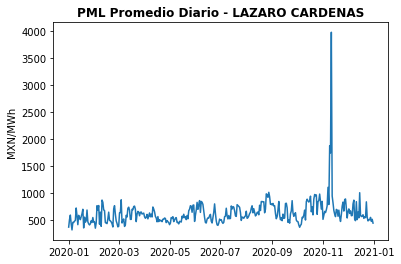

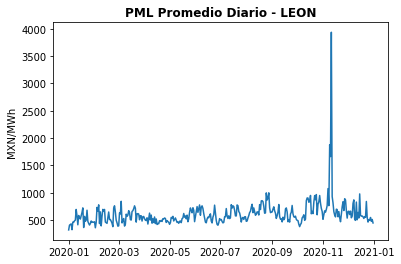

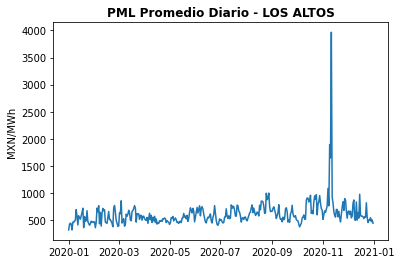

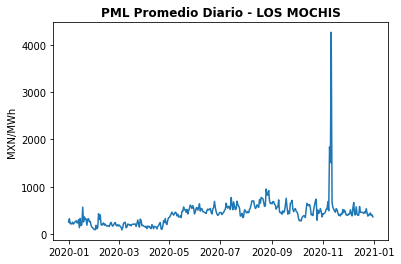

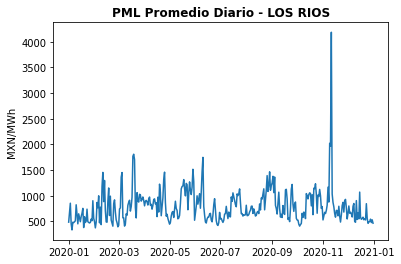

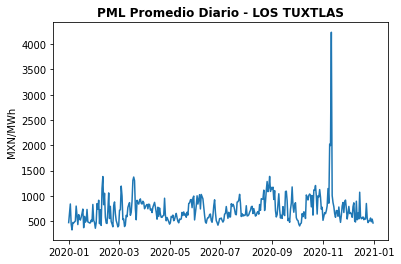

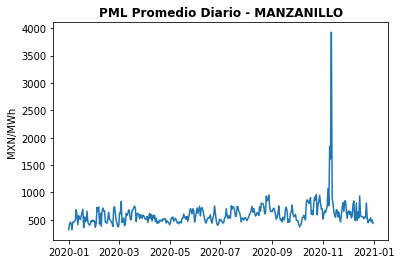

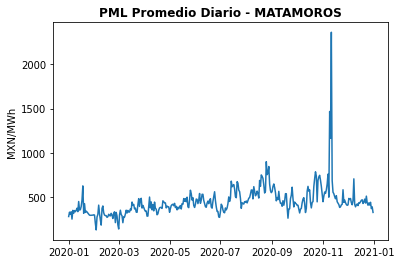

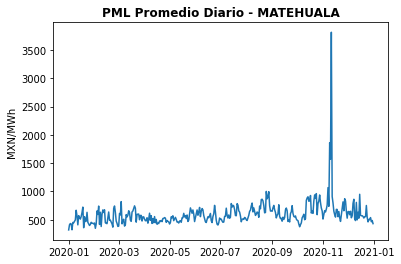

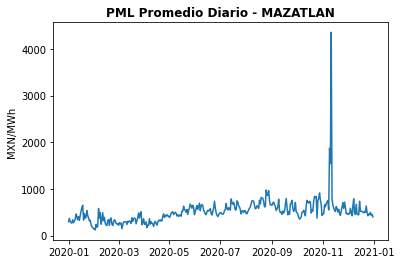

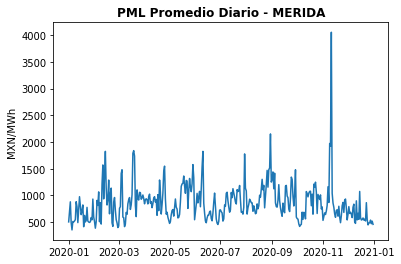

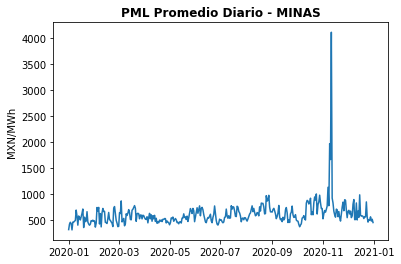

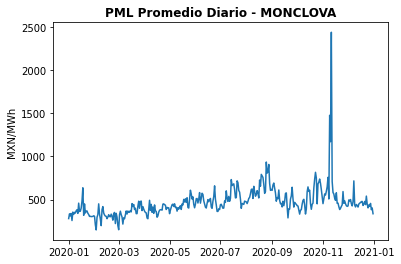

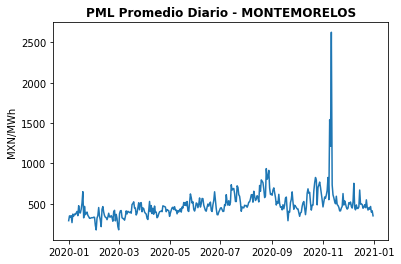

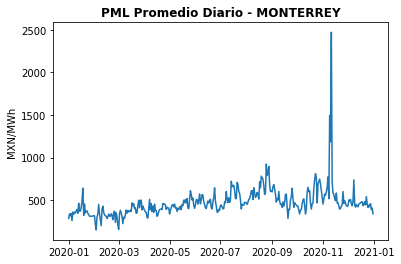

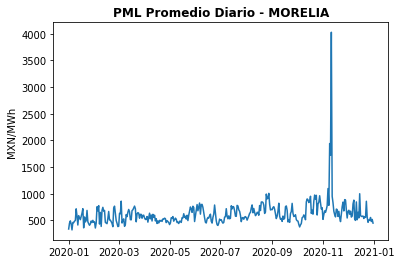

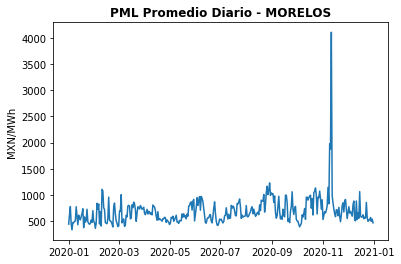

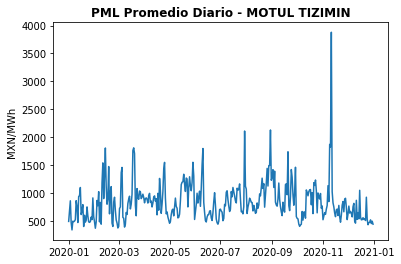

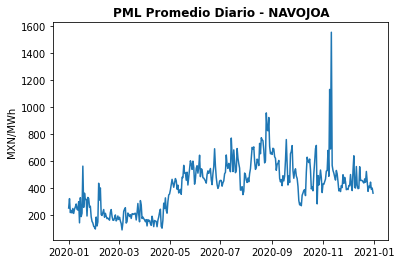

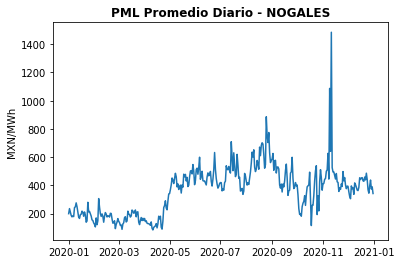

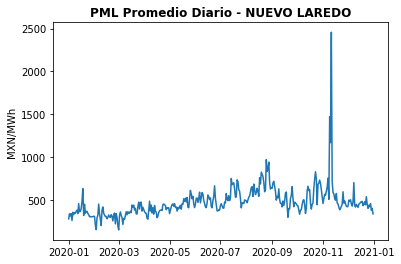

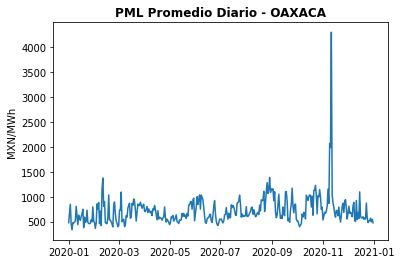

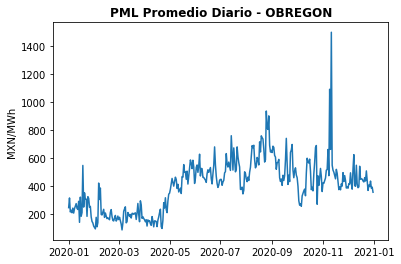

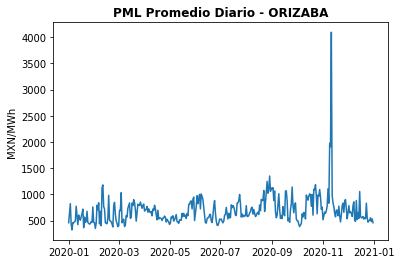

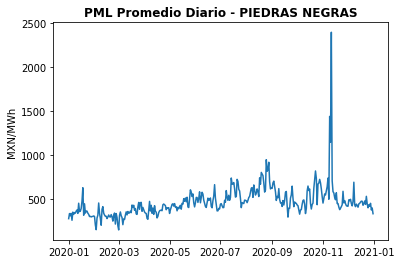

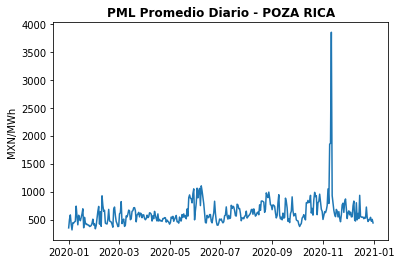

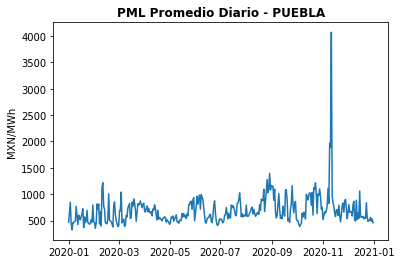

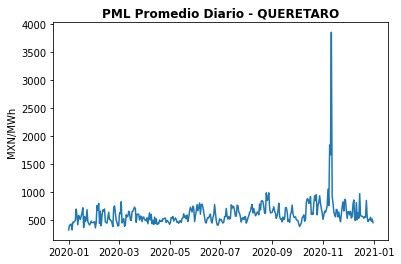

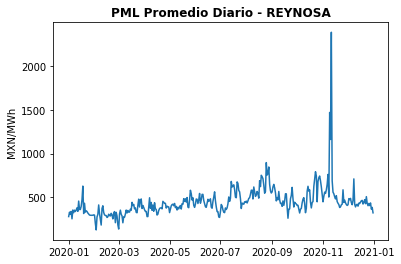

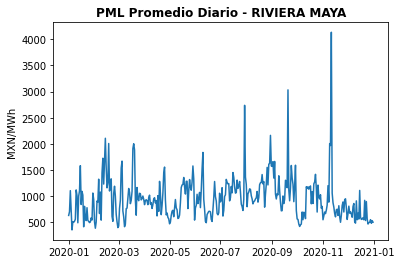

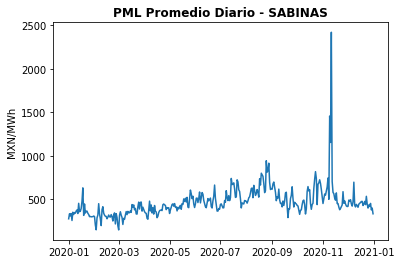

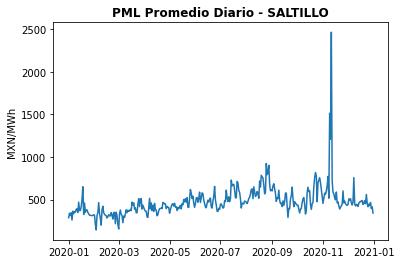

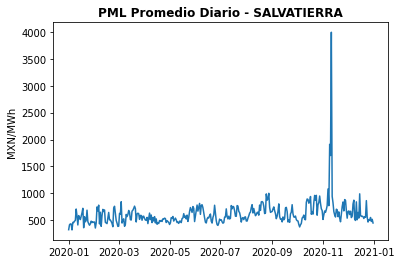

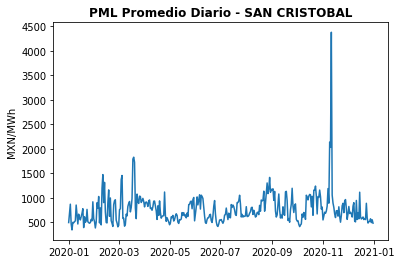

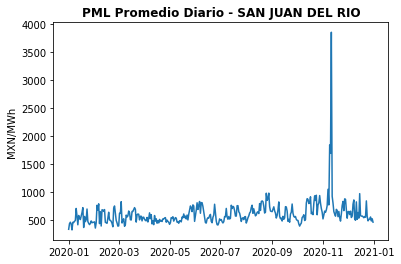

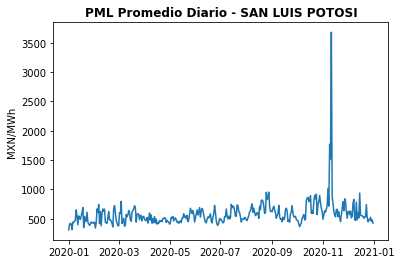

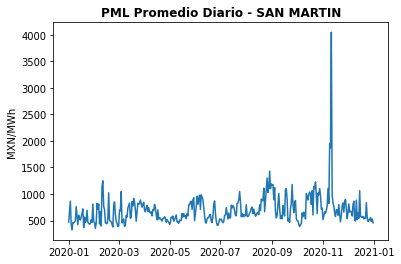

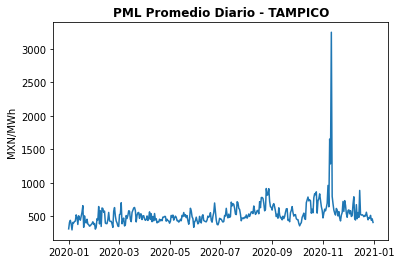

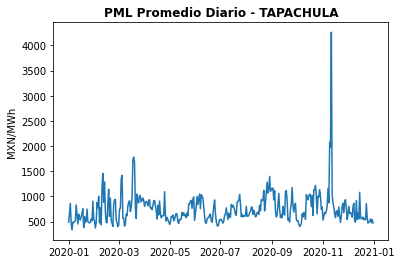

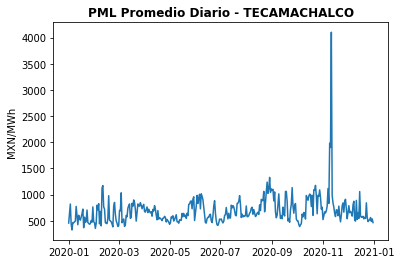

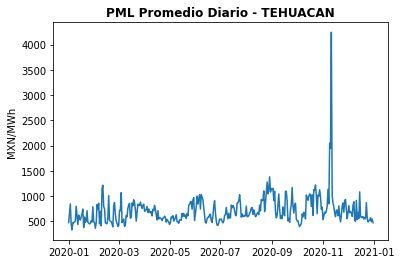

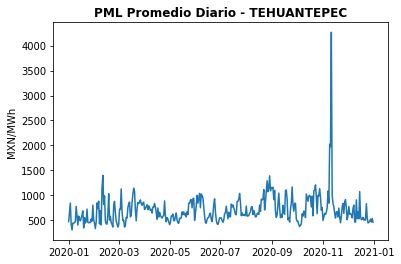

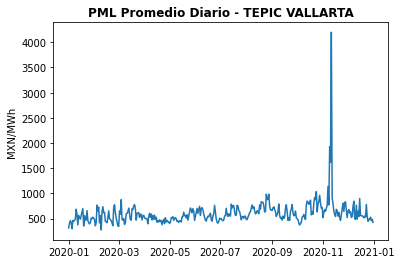

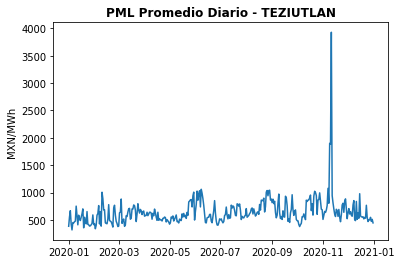

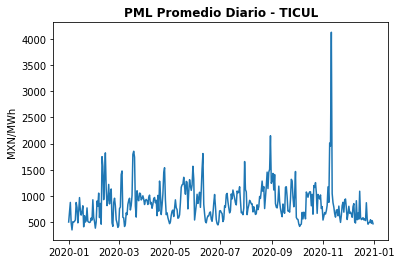

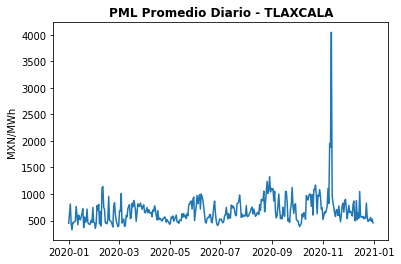

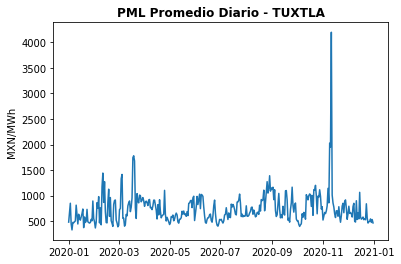

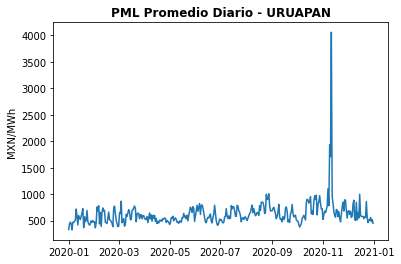

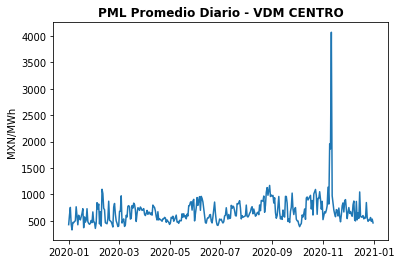

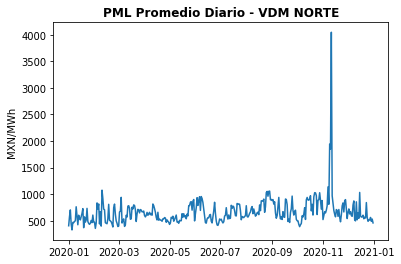

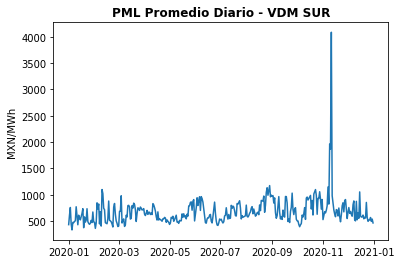

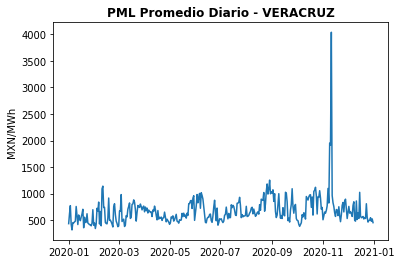

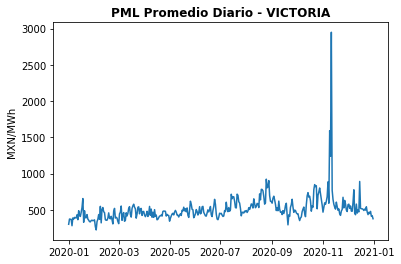

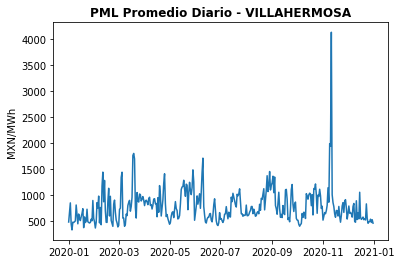

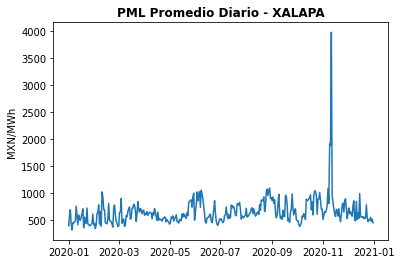

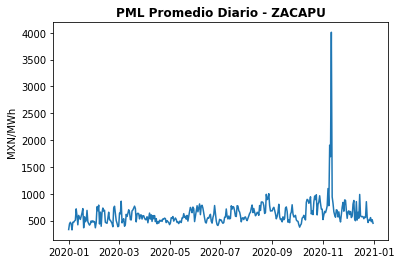

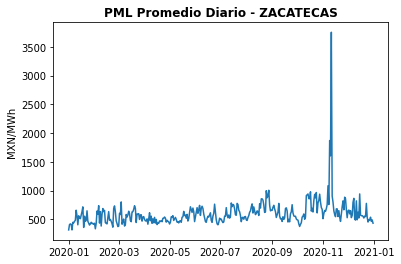

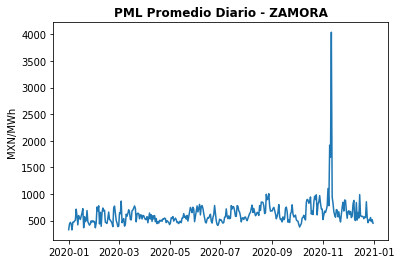

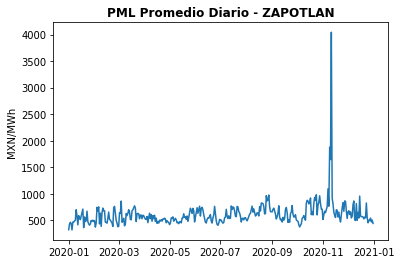

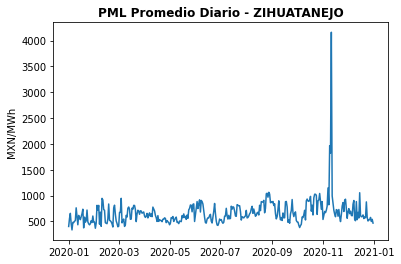

In [ ]:
for i in range(len(Zonas)):
  plot_data = PML_diario.loc[PML_diario['Zona'] == Zonas[i]][['Fecha','PML']]
  #Graficamos
  plt.plot(plot_data['Fecha'],plot_data['PML'])
  #Añadimos una etiqueta al eje y
  plt.ylabel('MXN/MWh', fontsize = 10) 
  #Añadimos un título para nuestra gráfica
  plt.title('PML Promedio Diario' + ' - ' + Zonas[i]  , fontsize = 12, weight = 'bold')
  #Para mostrar la gráficaa    
  plt.show()

Es exactamente el mismo código, solo que se añadió en la segunda línea del for loop un procedimiento para calcular el promedio móvil con una ventana/window = 15. Esto significa que, para el 16 de enero tomara como valor el promedio dado entre los 15 días anteriores. Esto provocará que se pierdan los primeros 15 valores de PML. Pero esto nos permite eliminar el ruido de la gráfica anterior, creando un efecto que hace la curva más suave

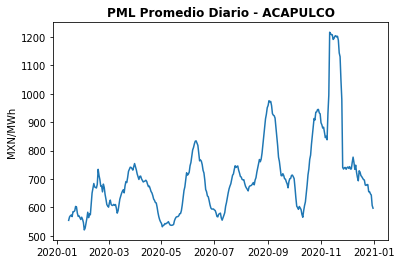

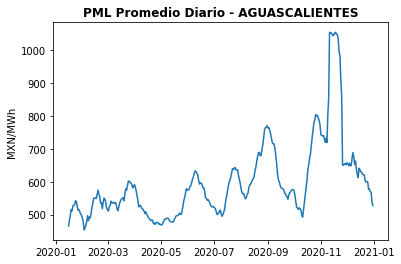

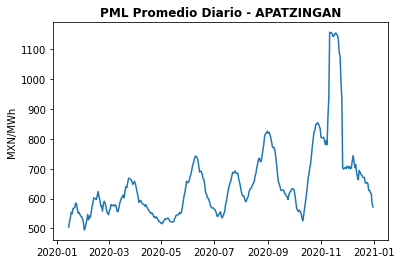

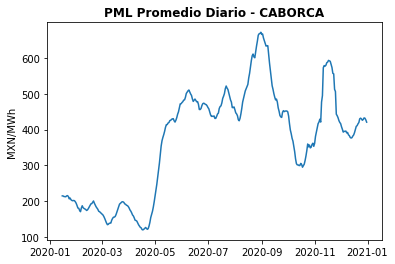

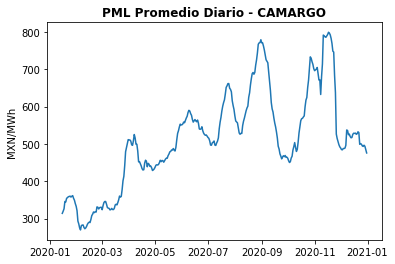

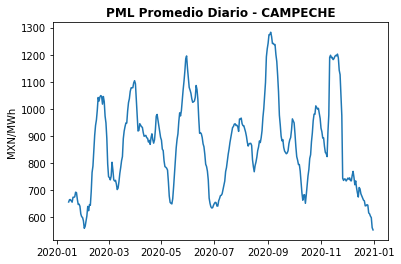

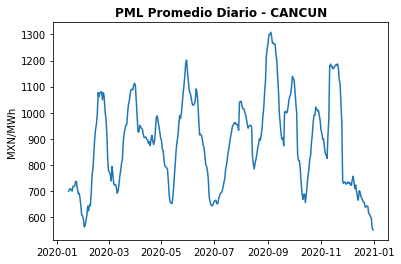

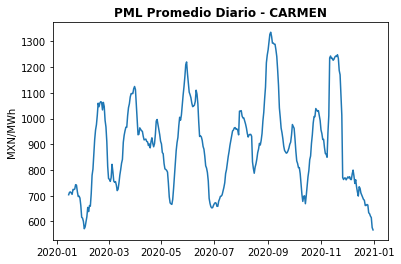

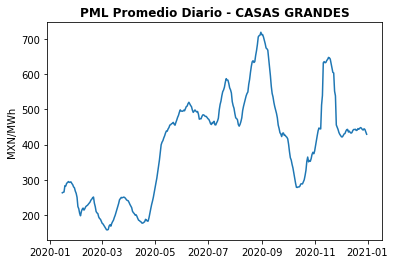

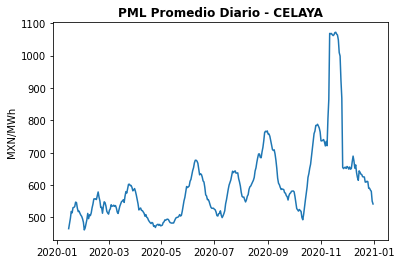

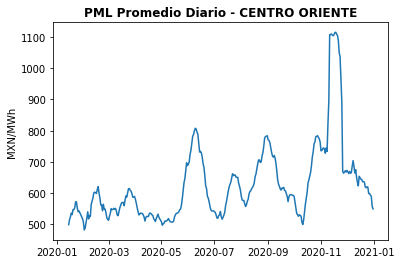

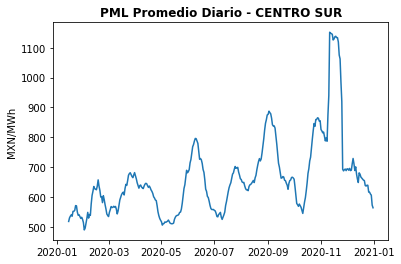

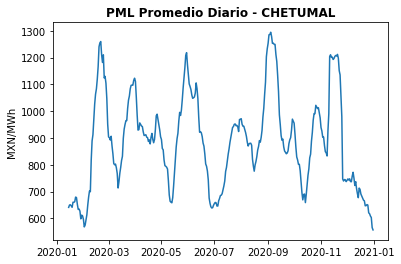

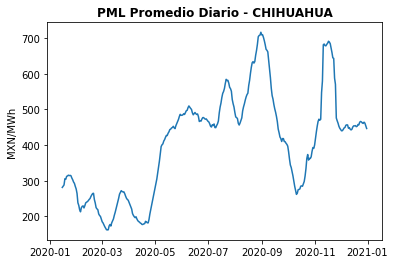

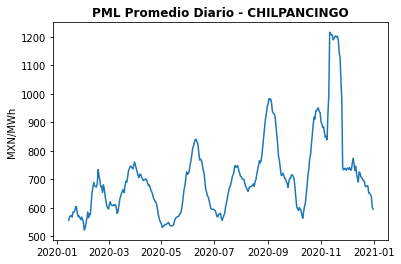

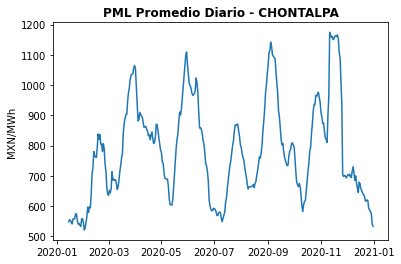

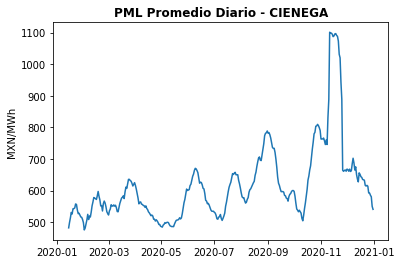

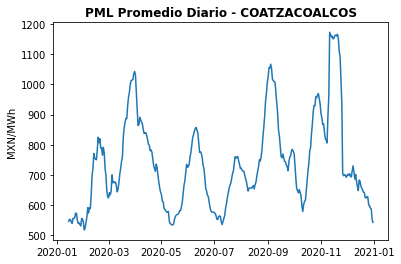

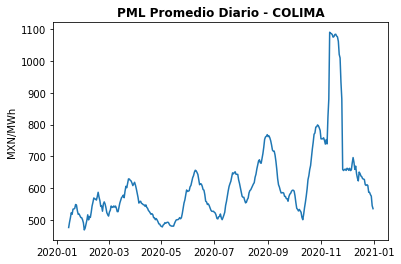

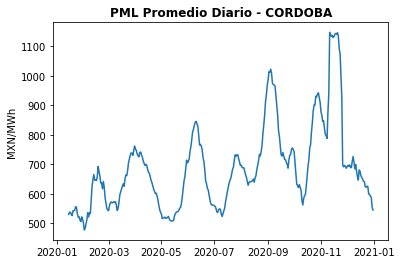

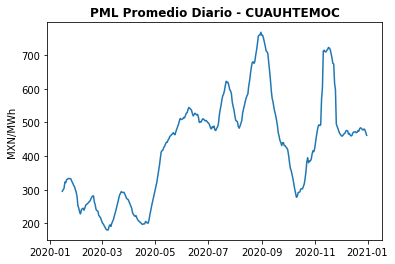

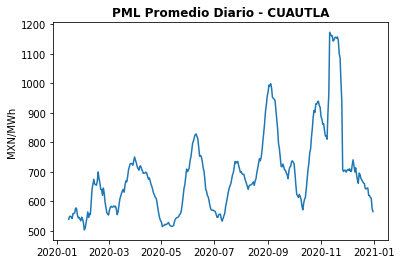

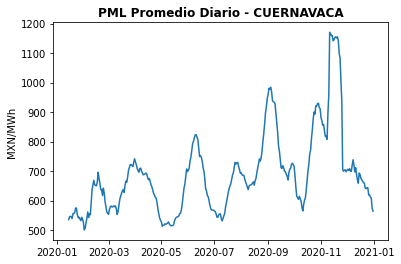

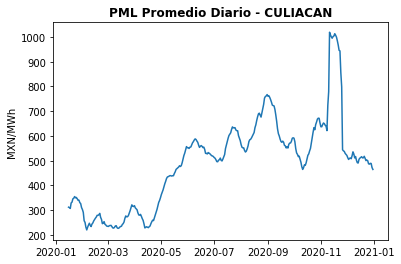

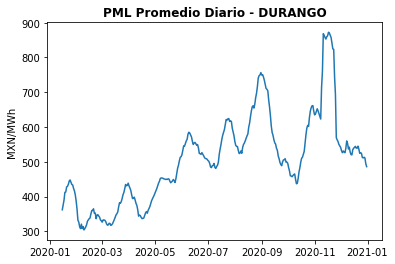

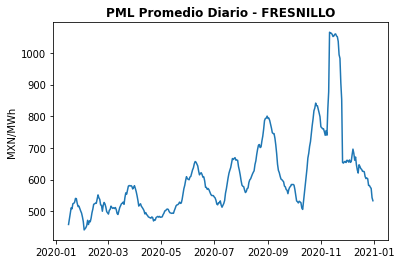

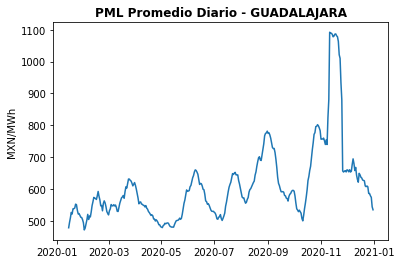

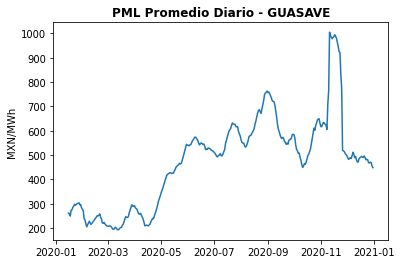

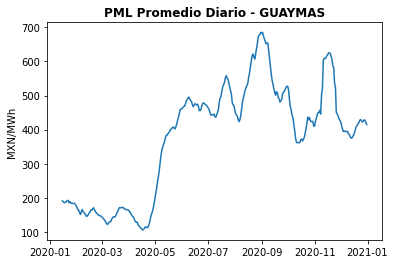

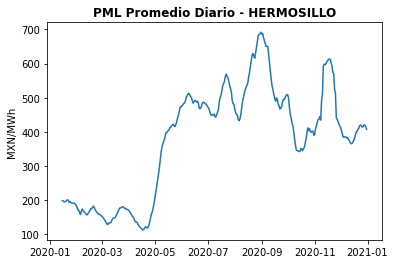

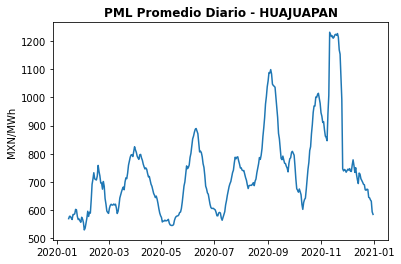

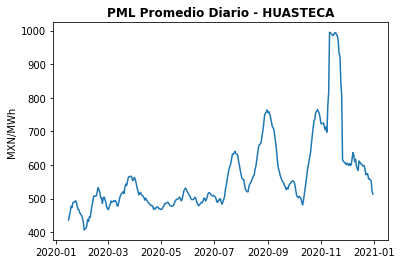

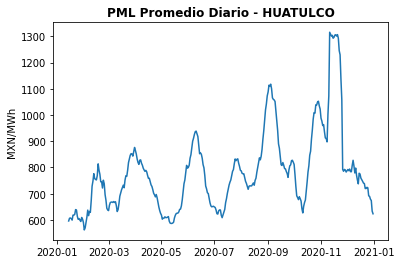

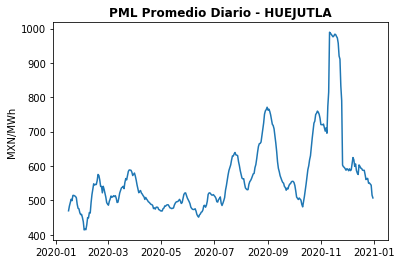

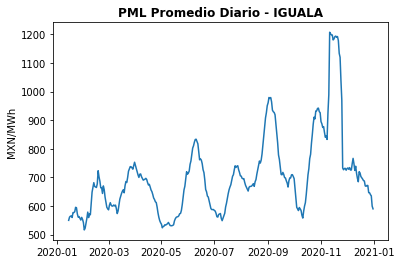

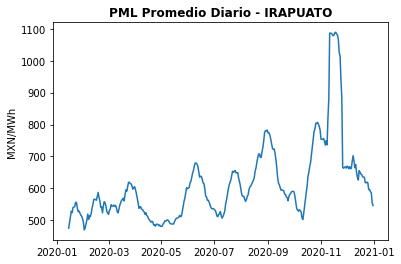

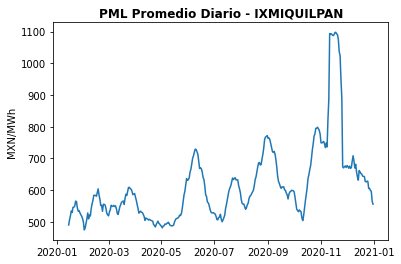

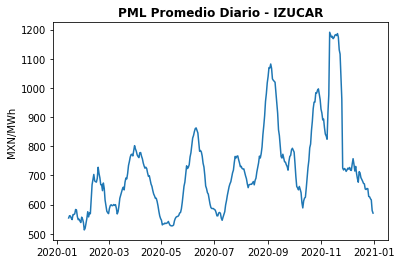

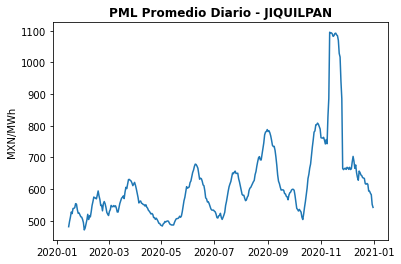

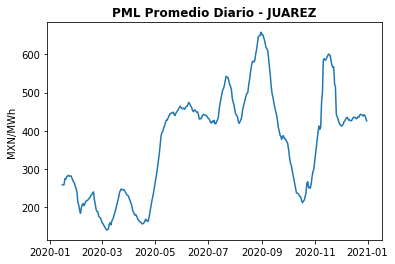

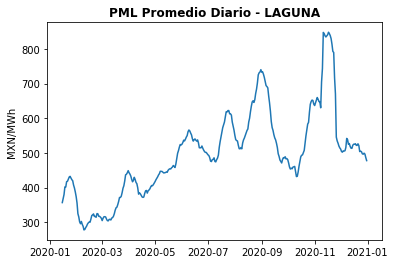

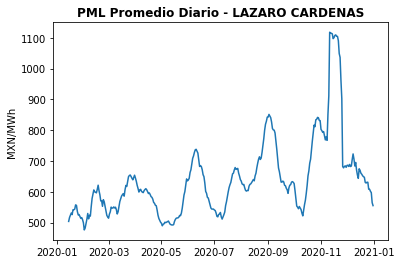

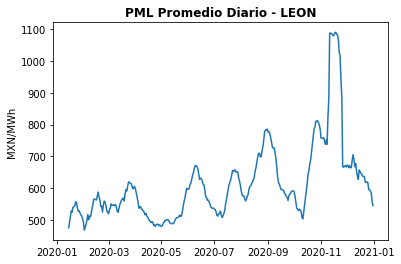

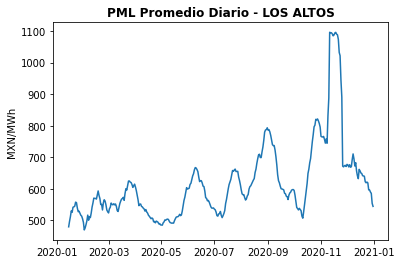

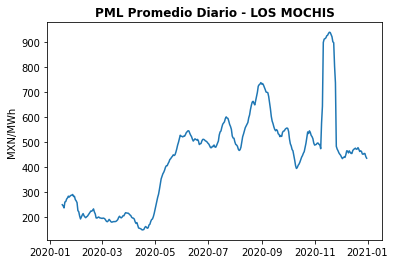

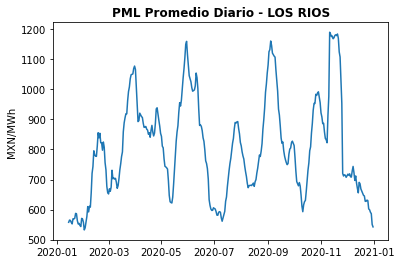

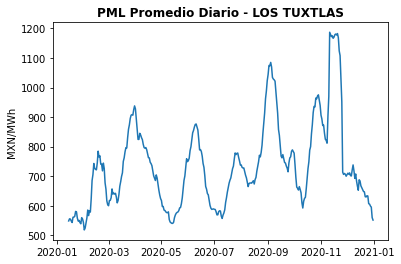

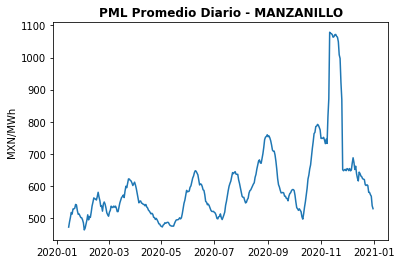

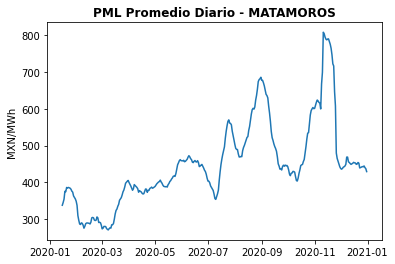

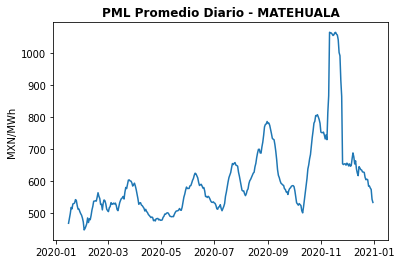

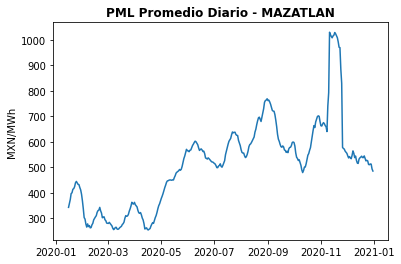

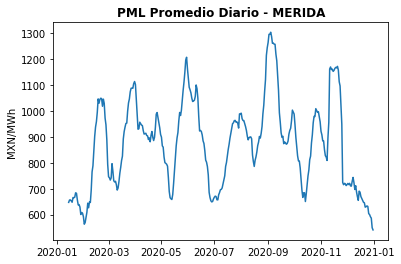

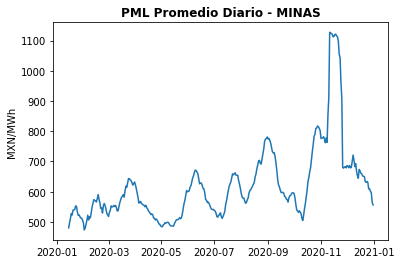

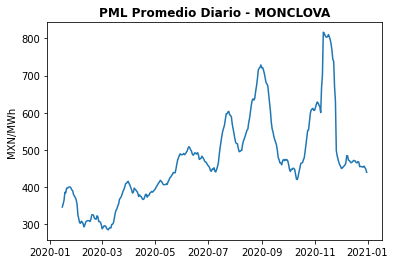

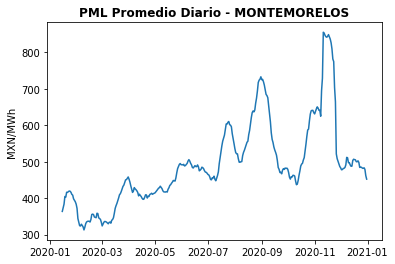

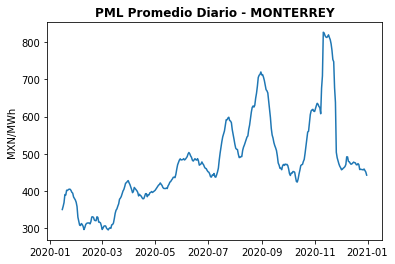

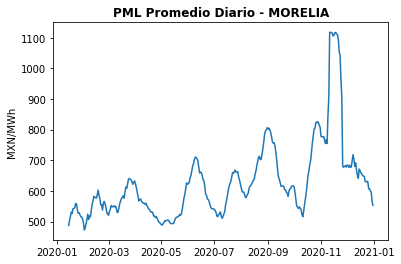

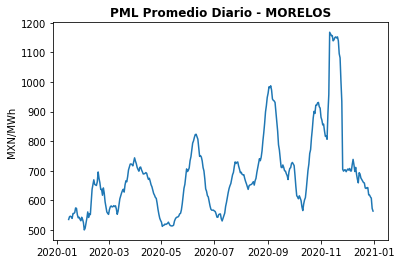

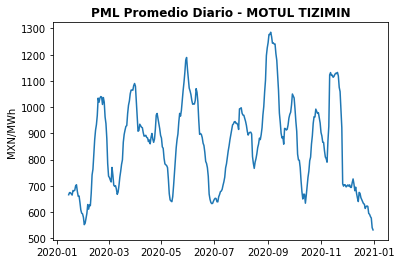

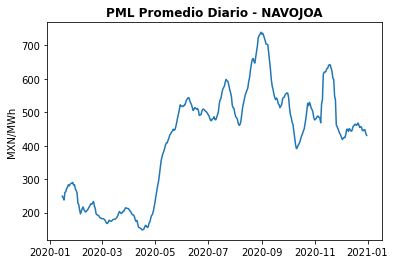

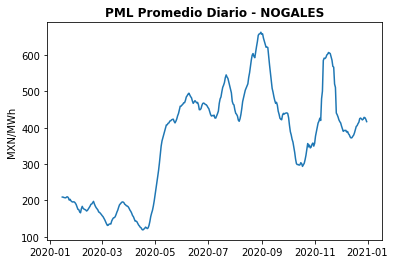

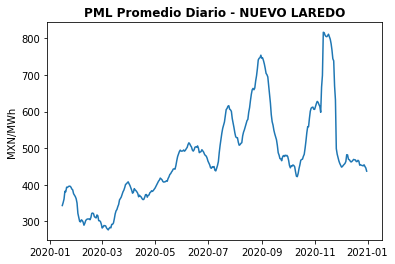

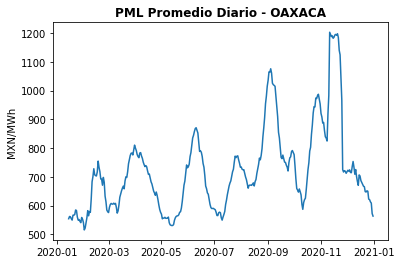

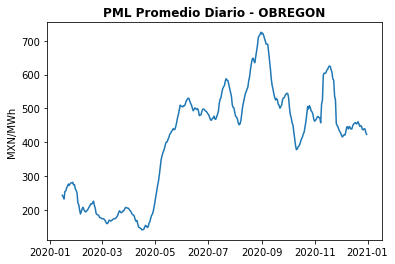

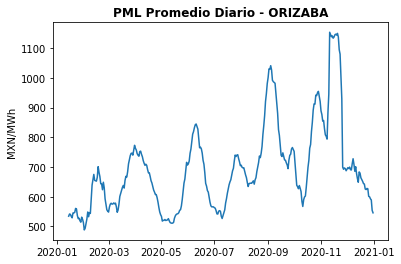

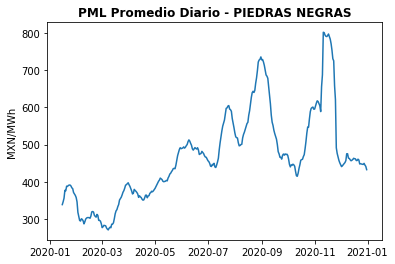

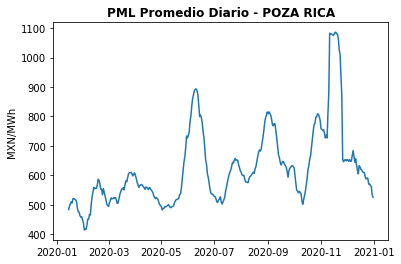

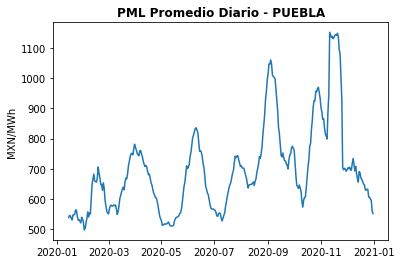

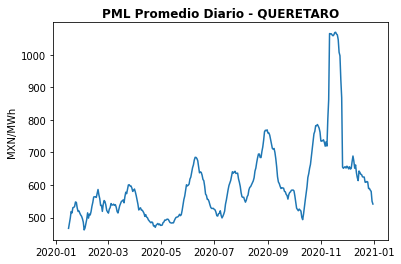

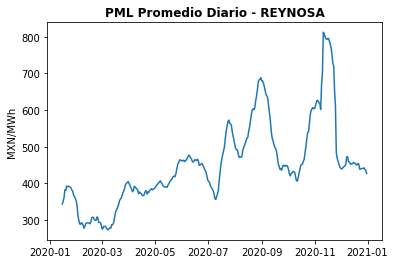

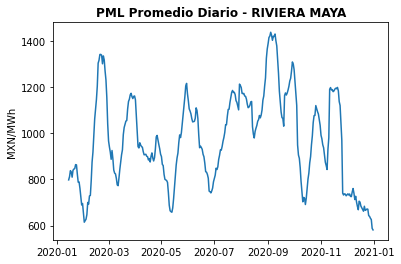

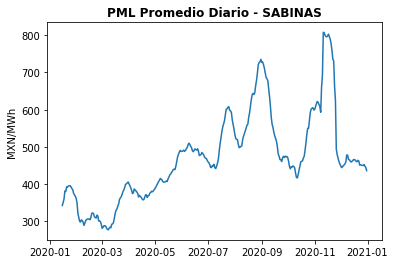

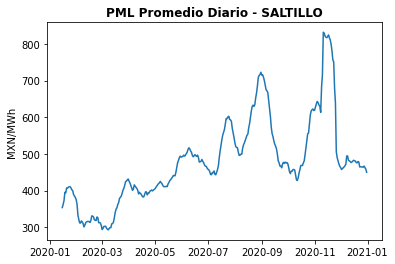

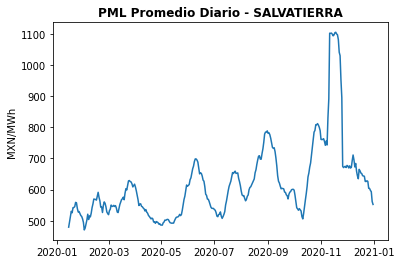

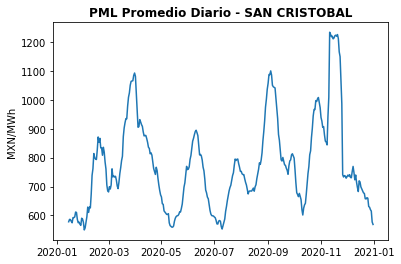

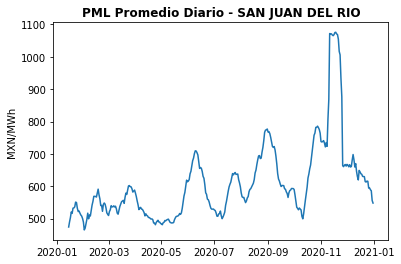

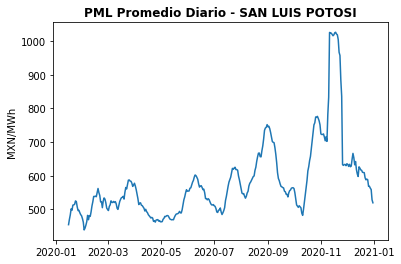

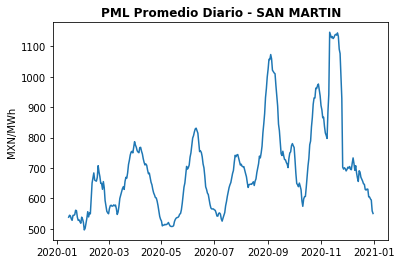

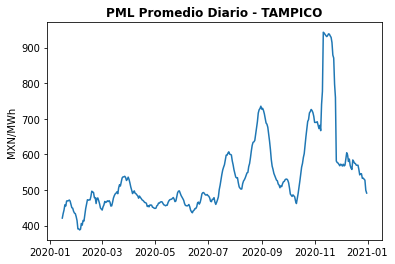

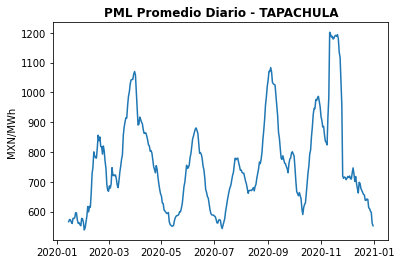

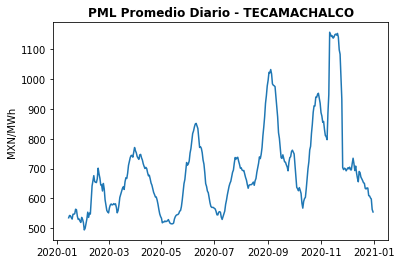

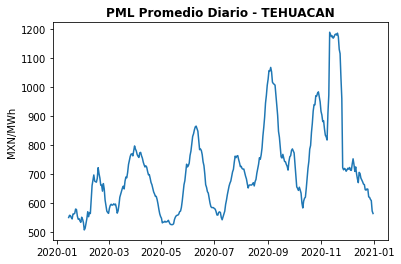

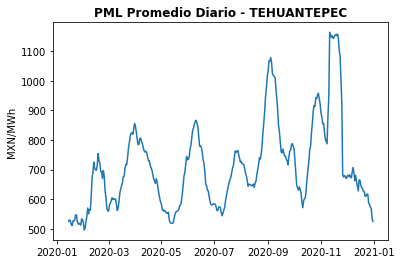

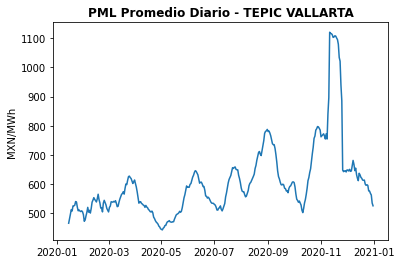

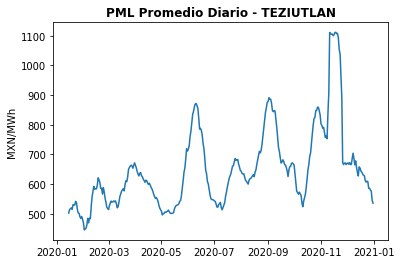

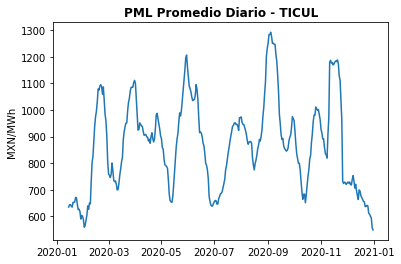

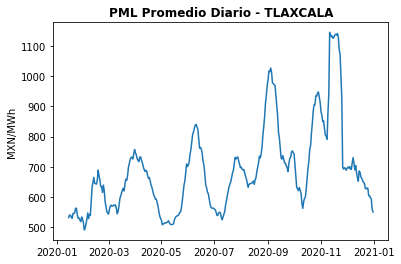

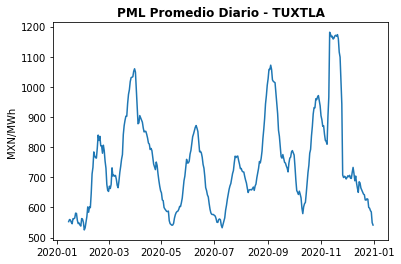

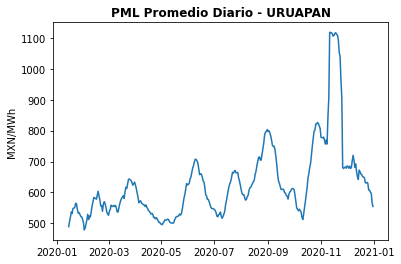

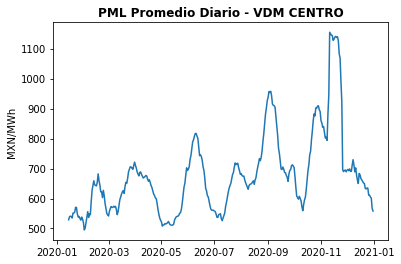

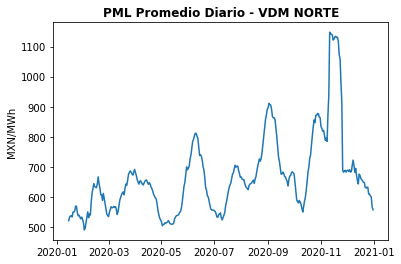

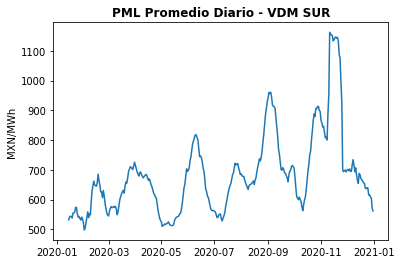

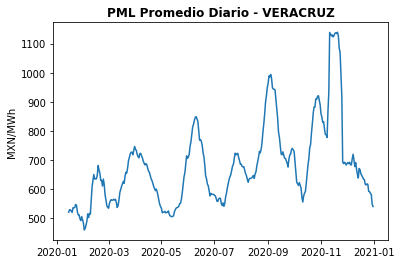

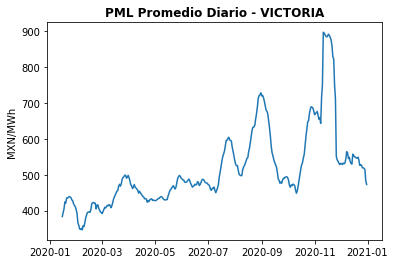

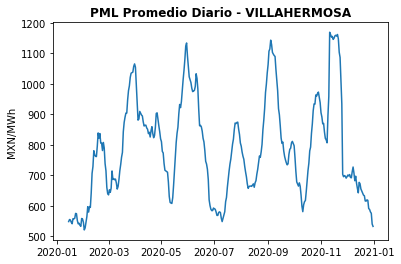

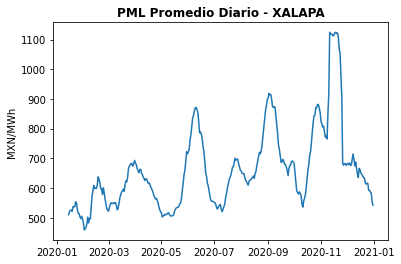

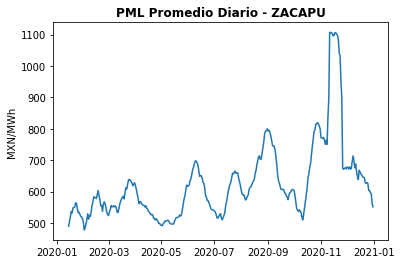

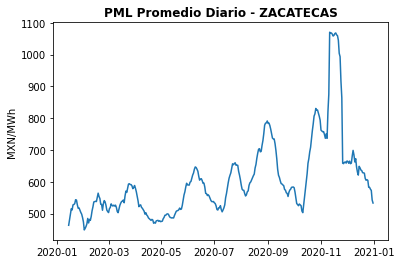

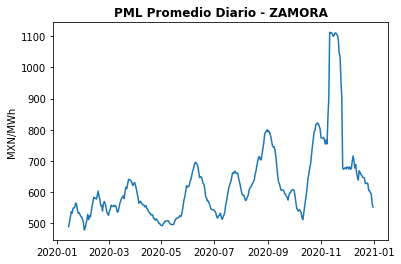

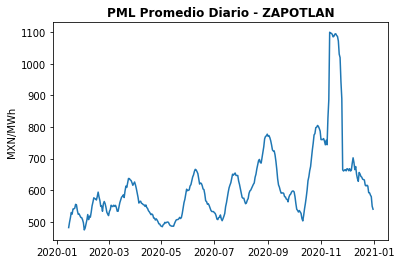

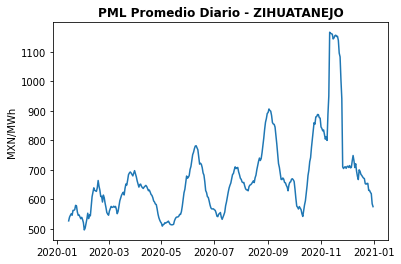

Fecha         PML
100   2020-01-01         NaN
201   2020-01-02         NaN
302   2020-01-03         NaN
403   2020-01-04         NaN
504   2020-01-05         NaN
...          ...         ...
36561 2020-12-27  630.212972
36662 2020-12-28  623.679194
36763 2020-12-29  619.199056
36864 2020-12-30  584.865500
36965 2020-12-31  575.239500

[366 rows x 2 columns]

In [ ]:
for i in range(len(Zonas)):
  plot_data = PML_diario.loc[PML_diario['Zona'] == Zonas[i]][['Fecha','PML']]
  plot_data['PML'] = plot_data['PML'].rolling(window=15).mean()
  plt.plot(plot_data['Fecha'],plot_data['PML'])
  plt.ylabel('MXN/MWh', fontsize = 10)
  plt.title('PML Promedio Diario' + ' - ' + Zonas[i]  , fontsize = 12, weight = 'bold')    
  plt.show()  

Ahora quiero visualizar la distribución de PML para cada zona de carga, ```plt.hist()``` será la función que no ayude a crear nuestro histograma, a la cual solo debemos proveerle como argumento una sola columna, en este caso los PML. el argumento ```bins``` indica en cuantos rangos/casillas quiero dividir mi conjunto de valores  (varie este valor para observar). El argumento ```range``` fue algo opcional que agregué para que la gráfica solo muestre valores de aquellos PML que estuvieron por debajo de 2000 (Quite este argumento para obesrvar su efecto)

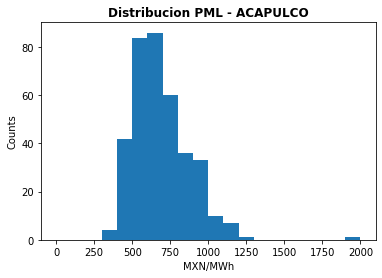

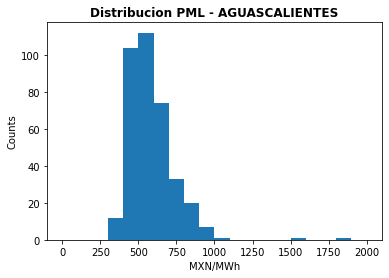

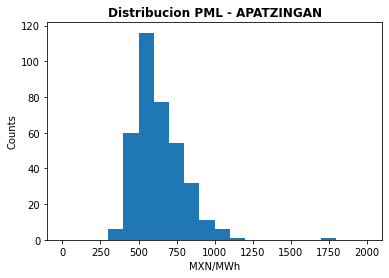

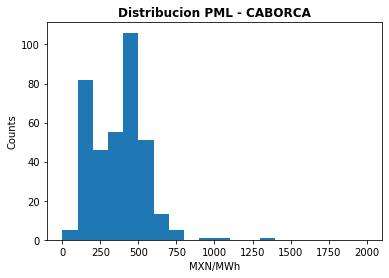

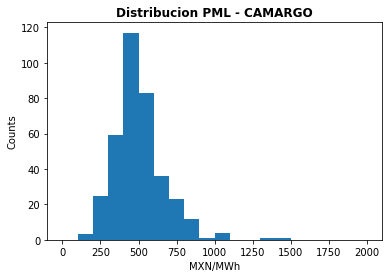

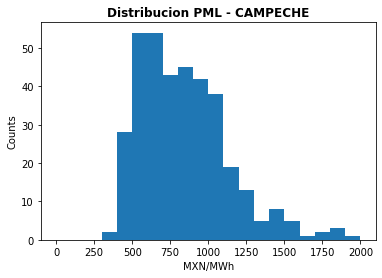

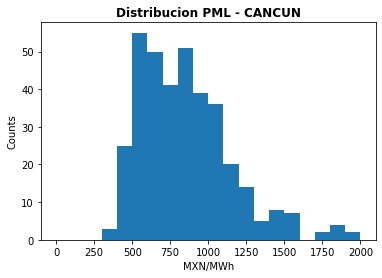

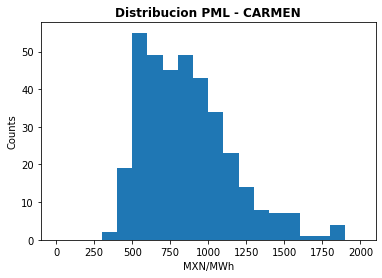

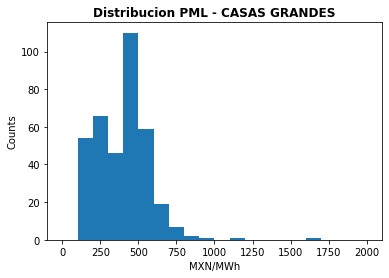

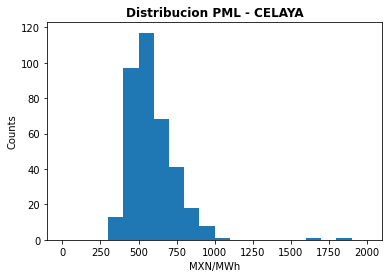

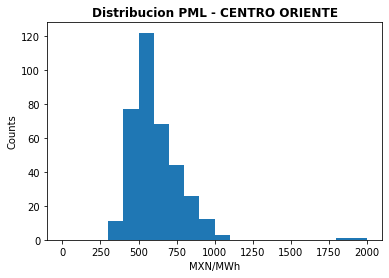

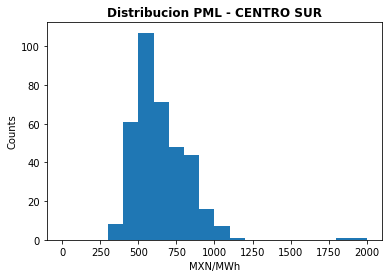

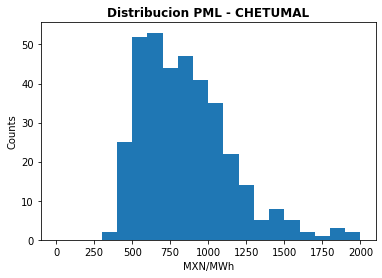

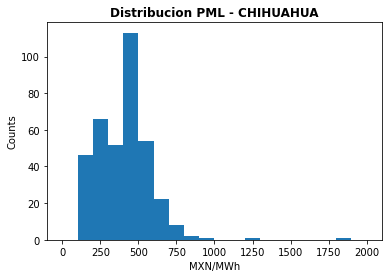

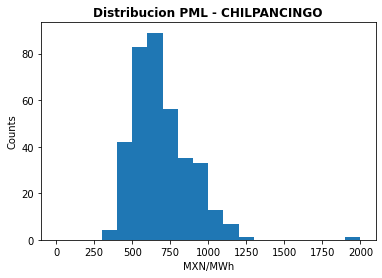

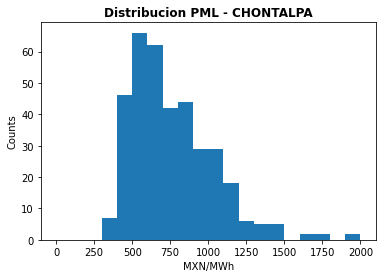

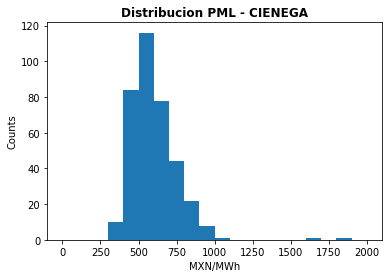

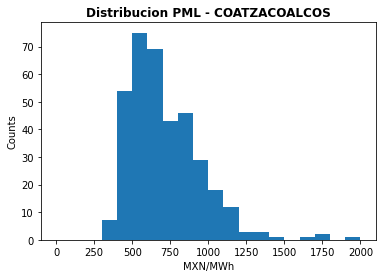

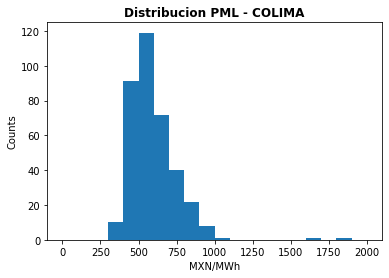

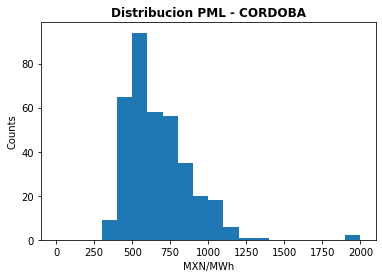

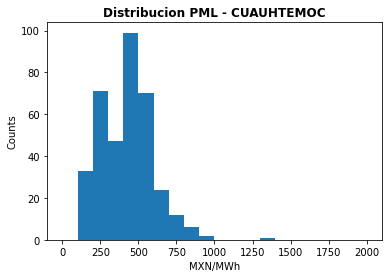

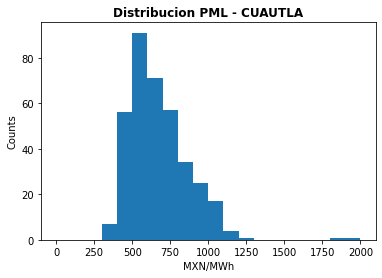

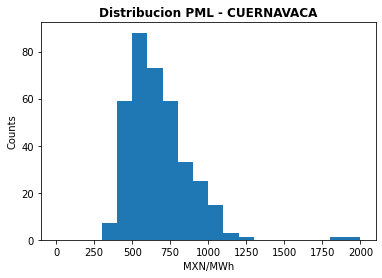

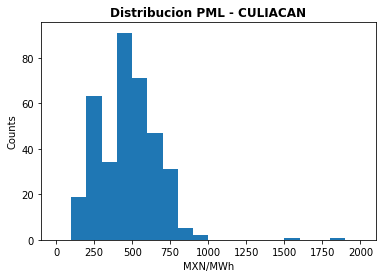

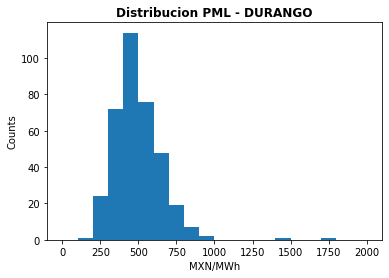

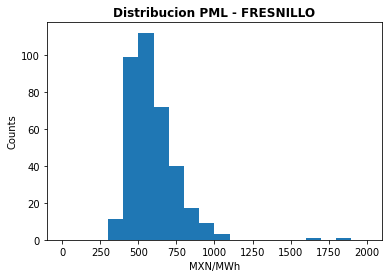

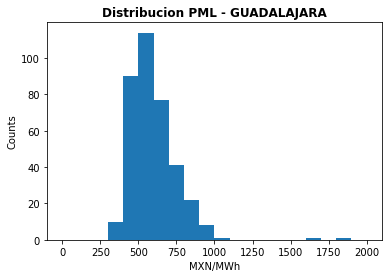

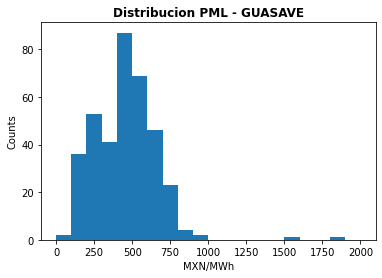

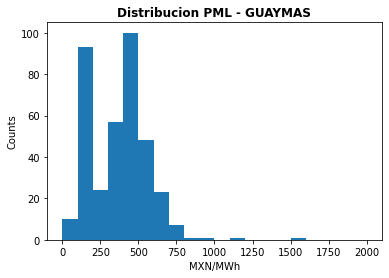

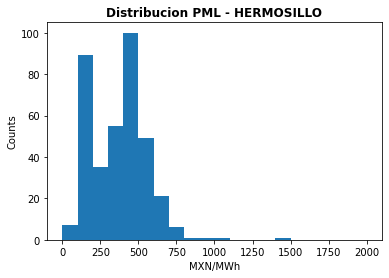

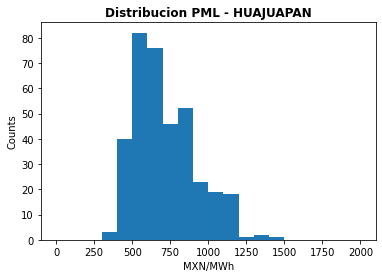

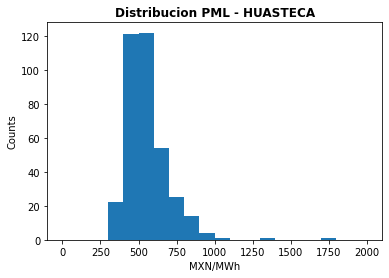

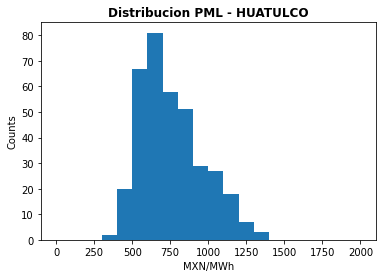

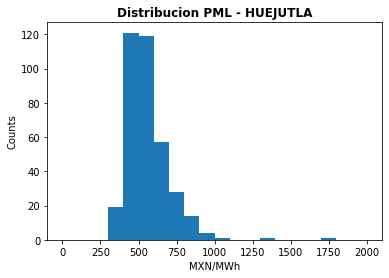

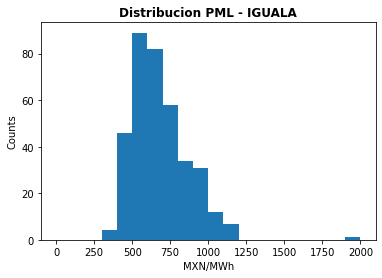

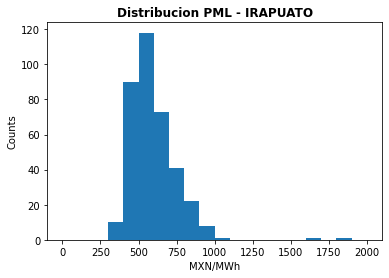

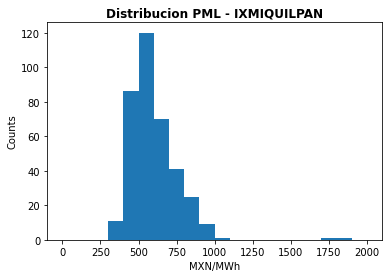

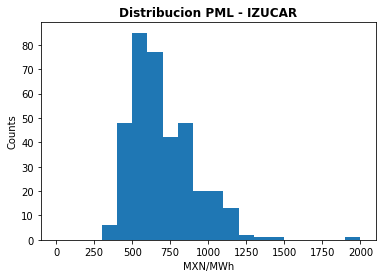

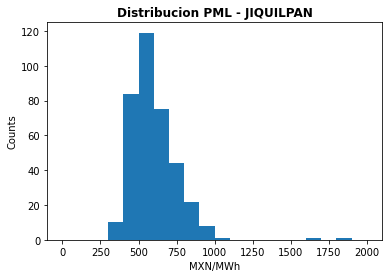

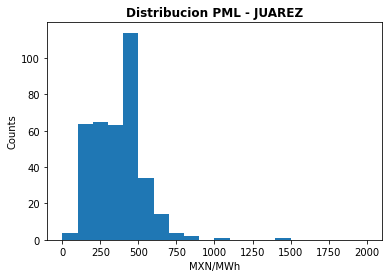

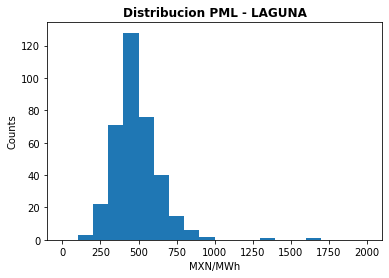

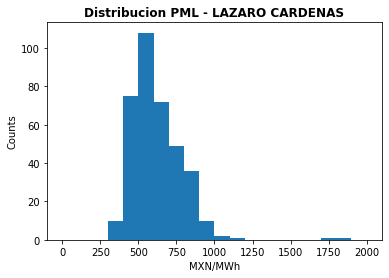

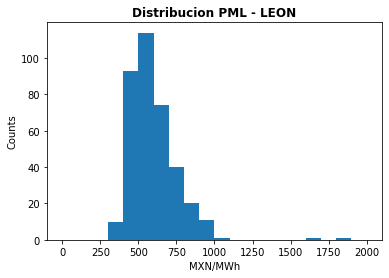

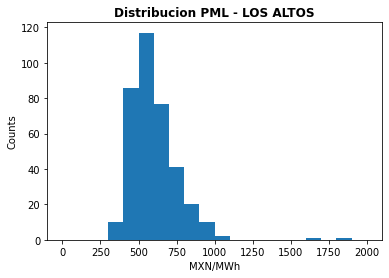

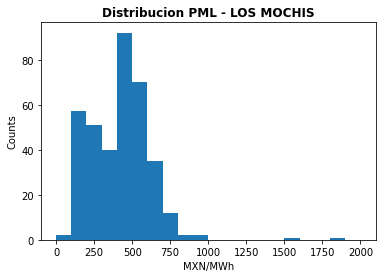

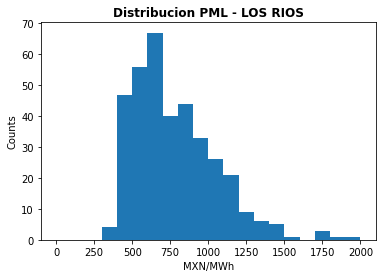

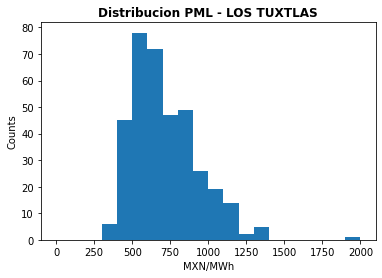

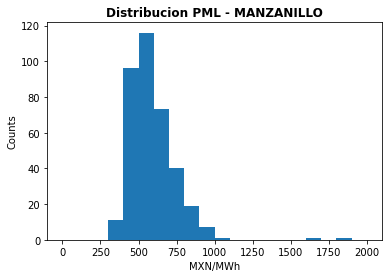

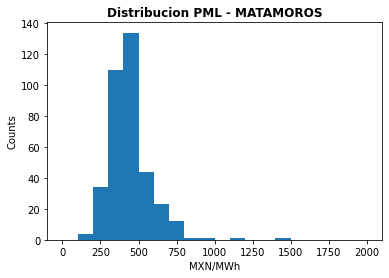

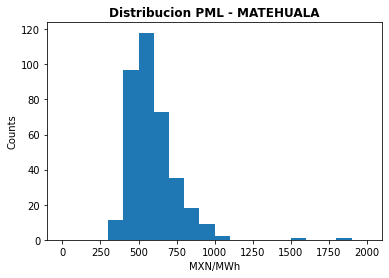

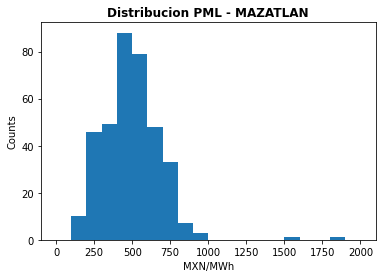

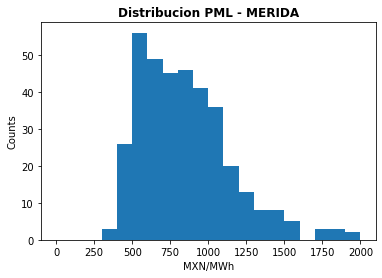

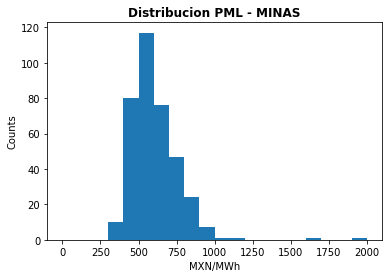

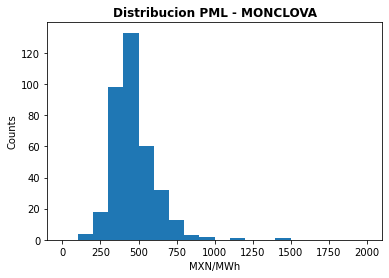

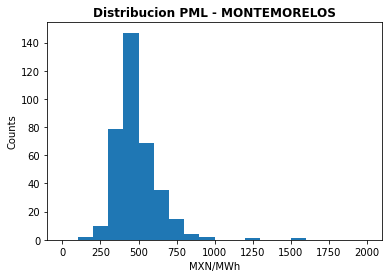

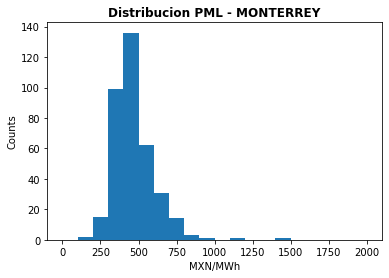

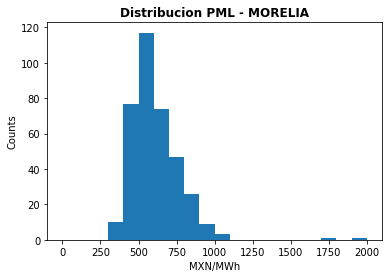

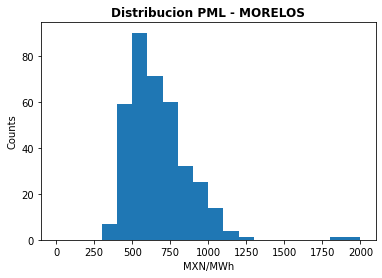

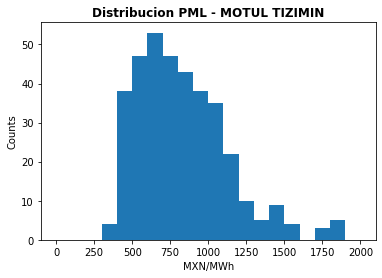

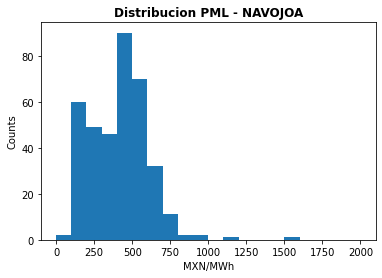

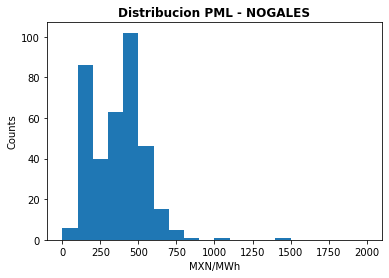

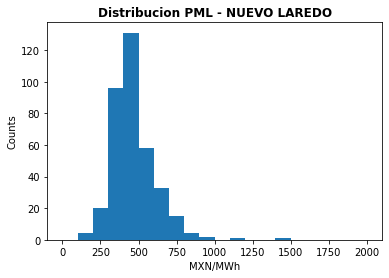

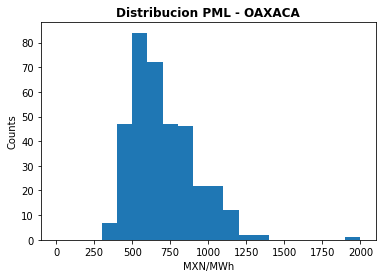

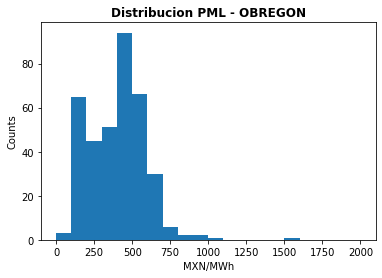

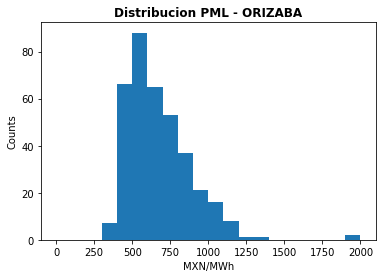

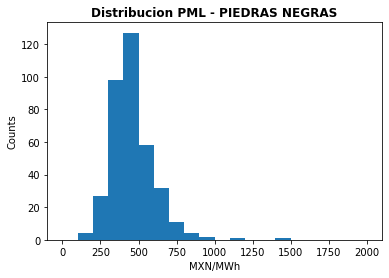

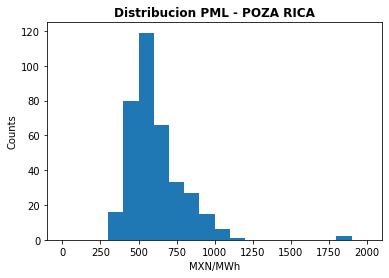

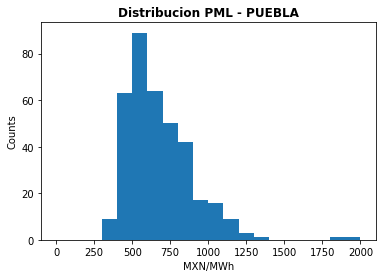

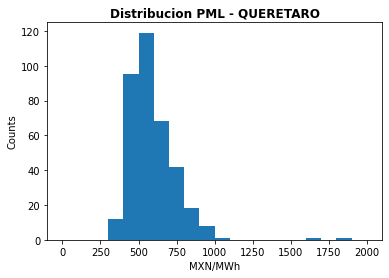

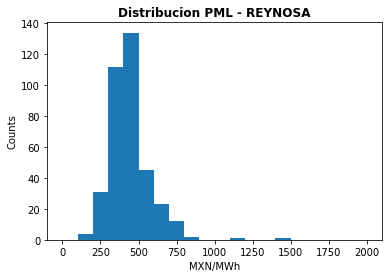

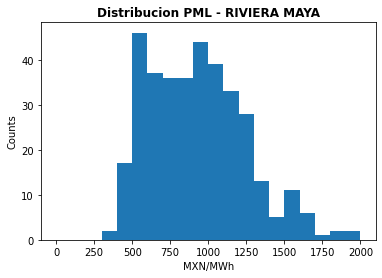

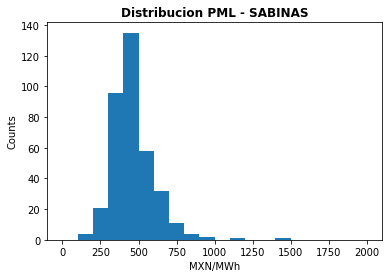

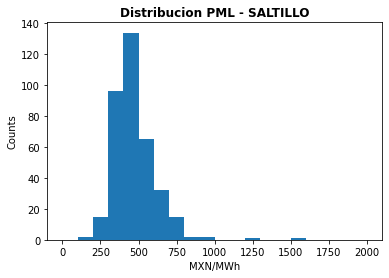

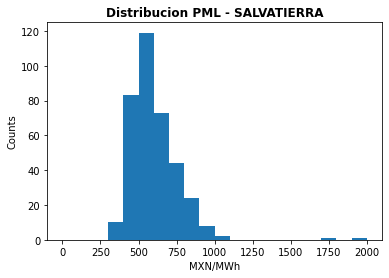

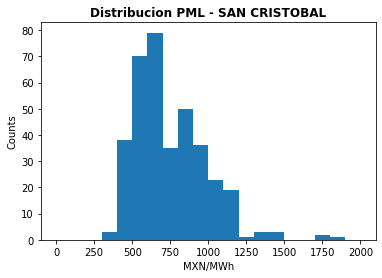

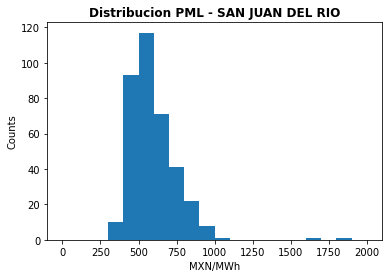

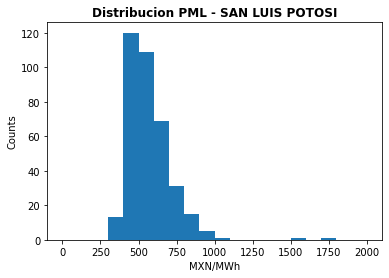

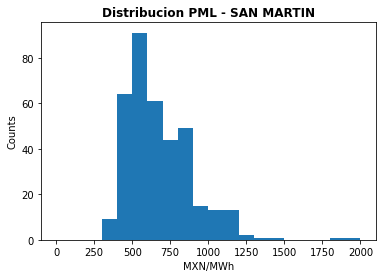

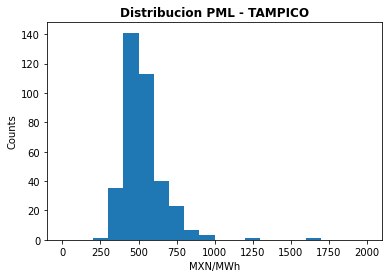

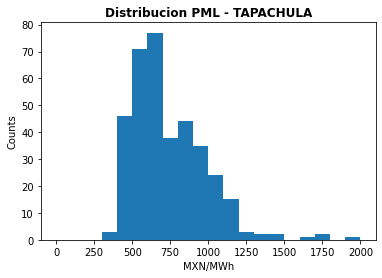

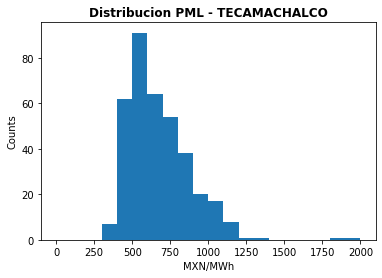

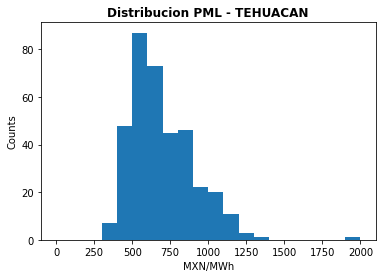

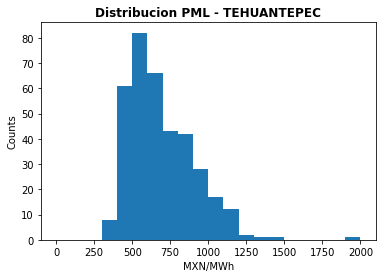

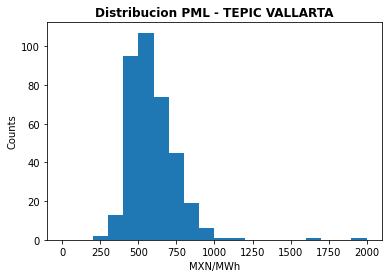

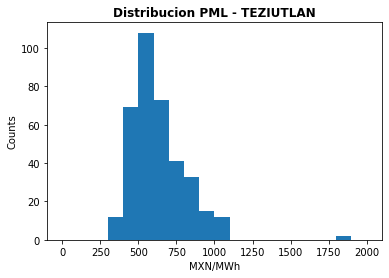

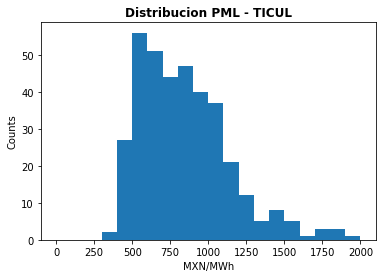

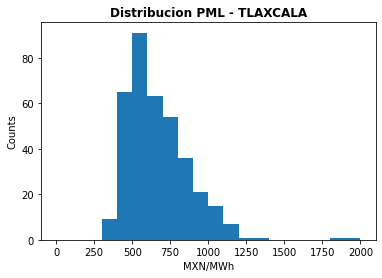

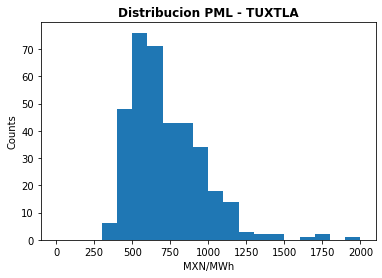

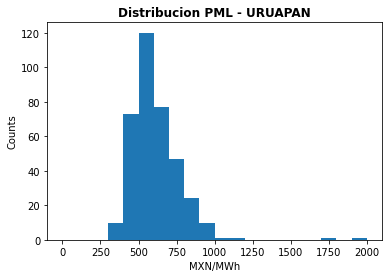

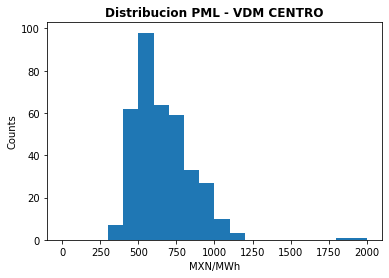

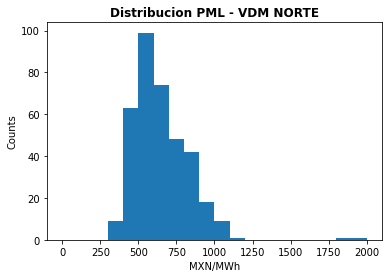

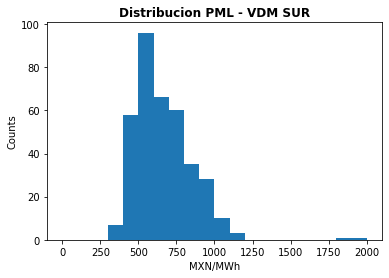

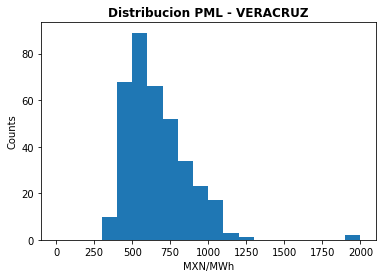

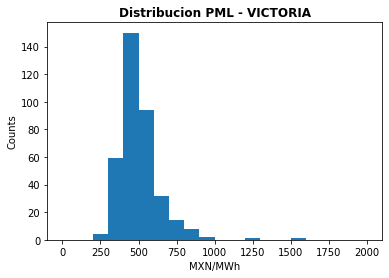

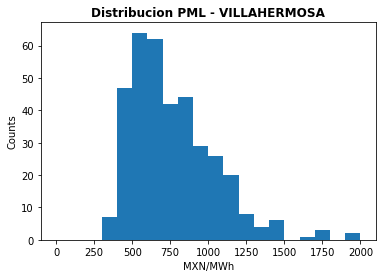

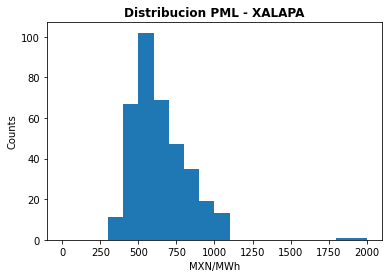

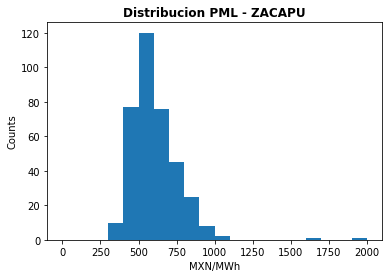

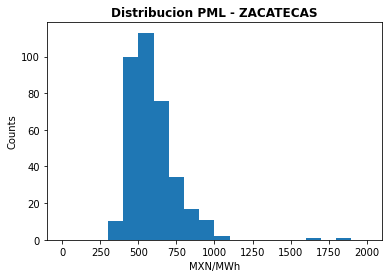

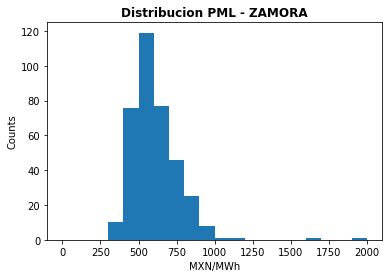

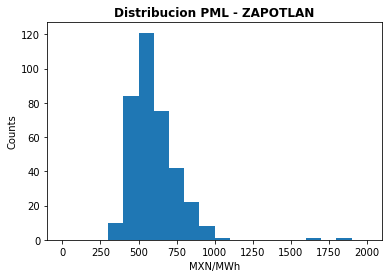

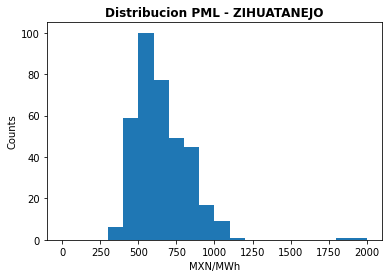

In [ ]:
for i in range(len(Zonas)):    
    plot_data = PML_diario.loc[(PML_diario['Zona'] == Zonas[i])][['PML']]    
    plt.hist(plot_data['PML'],bins=20,range=(0,2000)) 
    plt.xlabel('MXN/MWh', fontsize = 10)
    plt.ylabel('Counts', fontsize = 10)
    plt.title('Distribucion PML' + ' - ' + Zonas[i]  , fontsize = 12, weight = 'bold')    
    plt.show()